In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [3]:
c = twint.Config()
c.Search = "Inception"
c.Limit = 7000
c.Since = "2010-04-01"
c.Until = "2011-01-29"
c.Pandas = True

# Run
twint.run.Search(c)

30776953027956739 2011-01-27 18:59:32 -0500 <EmilyNMurray> Watching inception. Joseph gordon-levitt. Oh yeah :)
30776922921246720 2011-01-27 18:59:24 -0500 <LisaAsanuma> Ken Watanabe &lt;---Reason to see Inception more than once. (See also: Tom Hardy)
30776462000791552 2011-01-27 18:57:34 -0500 <MsAllurer> #NW Inception! yh yh yh.. stale girl.. waheva.. According to ibo proverb translated to english "The older the wine, the sweeter the taste"
30776412738682880 2011-01-27 18:57:23 -0500 <AlexaChill> 'Black Swan', 'The Social Network', 'Inception' si 'Eat Pray Love 'recuperate si bifate . Another suggestions?
30776381751173121 2011-01-27 18:57:15 -0500 <MarioCayetano> I just voted for Inception for #BestScreenplay on Oscar.com via @TheAcademy.  http://soc.li/MiotdtD
30776214385860608 2011-01-27 18:56:35 -0500 <forrestfire101> @spastikchuwawa +Inception soundtrack
30775911884390400 2011-01-27 18:55:23 -0500 <WillieGotWings> FINALLY watching Inception, my dad fixed my surround sound
307759

30765682517872641 2011-01-27 18:14:44 -0500 <QuixoticExotic> @tomlafferty I understand that Nolan either drinks a lot of coffee or smokes a lot of pot. #inception
30765597721624576 2011-01-27 18:14:24 -0500 <skye_writer> I've got almost all my homework done (almost because I can't watch Inception now, roomie is sleeping). Should I write or blog? #asktwitter
30765583129645056 2011-01-27 18:14:21 -0500 <tvsoup> Αδικήθηκε το Inception στα Oscars;:  Σύμφωνα με τον διακεκριμένο κινηματογραφικό συνθέτη Hans Zimmer, που είναι ...  http://bit.ly/dWk805
30765554558046208 2011-01-27 18:14:14 -0500 <advergirling> @clickeric I should have taken a picture of you taking the pic and it would have been like inception
30765528087797760 2011-01-27 18:14:08 -0500 <blue_blazered> Criando coragem pra tentar ver Inception de novo.
30765317705699328 2011-01-27 18:13:17 -0500 <ishmaelcasanova> Inception is my favorite movie. #JosephGordonLevittIWantToBoneAndMarryYou
30765307740037120 2011-01-27 18:13:15 -0500

30756717201457152 2011-01-27 17:39:07 -0500 <mattsmithies> @MelissaLR soz was watchin inception again. too intense for interwebz.
30756530240364544 2011-01-27 17:38:22 -0500 <AngelReignsNYC> Best movie ever RT @traviesa694: @RaquelReign Inception! But dont even blink while watching it or you'll get lost!
30756527597953024 2011-01-27 17:38:22 -0500 <Manoloseame> RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT RT RT y retweet del retweet...... Inception 2
30756489543028737 2011-01-27 17:38:13 -0500 <harrieverveer> @Catcch haha zo heb ik het niet begrepen, maar ja hoor je mag best ook komen. Ze wilde alleen wel Inception zien geloof ik :-p
30756461961285633 2011-01-27 17:38:06 -0500 <cerysjones> @laliandra @PigRescuer @LikeaLiar Seiously. I didn't even enjoy the film until I got into the fandom. Inception fandom is love.
30756397872316416 2011-01-27 17:37:51 -0500 <Srcook21> I'm trying to watch Inception.... I have started it over about 3 times

30748405160476672 2011-01-27 17:06:05 -0500 <JessicaBritton6> Having a quite night in with the boyfriend and watching Inception as meffy told me to watch :) xx
30748311208075264 2011-01-27 17:05:43 -0500 <Jaijal> Inception checke. Voor de uuhh...ff tellen...3e x XD
30748150130020352 2011-01-27 17:05:04 -0500 <Veronikcs> Quiniela Oscar: Mejores Efectos Especiales: por favor.. Obviamente Inception!!!! :)
30748038259544064 2011-01-27 17:04:38 -0500 <Kinky_Pixie> @GSnaps @RockinRamona @ashleighvegas NGL, I still haven't seen Inception.
30747826568826880 2011-01-27 17:03:47 -0500 <rockingtheshow> I am just like Inception, you think you understand me but you are never sure.
30747740698845185 2011-01-27 17:03:27 -0500 <mollusquemorn> @mahmoudhossam different from Inception, but underlying racial issues in White Wedding is interesting, though not overt  http://bit.ly/cKb782
30747736621981696 2011-01-27 17:03:26 -0500 <EverIguado> Inception,, I fell in love with It
30747576449900545 2011-01-27 

30740551464648704 2011-01-27 16:34:53 -0500 <A2AWalker> Just watched Inception. BluRay, HiDef TV, 5.1 surround sound, AWESOME movie!!!
30740223566548992 2011-01-27 16:33:35 -0500 <rob_houweling> Inception gekeken & uitgezet. Dun verhaal. Hoeveel "kick" wil je als je bus van een viaduct & 4 keer over de kop rolt #geenfan #matrixwannaB
30740111318585344 2011-01-27 16:33:08 -0500 <Rafaelaleao> @JoeGordonLevitt did a great job in "500 days of summer" and "Inception"
30739993869680640 2011-01-27 16:32:40 -0500 <rohera> your a queen. inception yer a dream (:
30739884096360448 2011-01-27 16:32:14 -0500 <Emre_Balaban> @asilbalaban asil inception indirdim aldığımız orjinal dvd den daha iyi kalite :D yeniden izlicem :D
30739807026024448 2011-01-27 16:31:55 -0500 <HallyRocker> Quer coisa mais inception que estar ouvindo dead or alive do Bon Jovi e ver uma nuvem no céu com a forma nítida de um cavalo?
30739719138582528 2011-01-27 16:31:34 -0500 <guilleru720> I liked a YouTube video -- How Inceptio

30731912842575872 2011-01-27 16:00:33 -0500 <InceptionMovies> Movie Review: Inception  http://bit.ly/fi8A2x
30731910435045376 2011-01-27 16:00:33 -0500 <InceptionMovies> INCEPTION – Is It Real?  http://bit.ly/gm0sC0
30731907218022400 2011-01-27 16:00:32 -0500 <InceptionMovies> .:The Red Angel:.: "Inception" Movie Review  http://bit.ly/gydZab
30731817455722497 2011-01-27 16:00:10 -0500 <iamsikora> Seriously got stuck in Inception
30731698362654720 2011-01-27 15:59:42 -0500 <FateUnseen> @TheJesusFish You're welcome. I'm proud to say I was there for the inception of diddle tech. It's a shame you didn't record it though.
30731440345845760 2011-01-27 15:58:40 -0500 <dick_figures> Inception's box office gross was huge - over $800 million. You had us at "gross." New Dick Figures starts... NOW!  http://bit.ly/hvNCkp
30731377737465858 2011-01-27 15:58:26 -0500 <FayeBrock1971> Emma Watson to Cast in Inception two  http://bit.ly/fU5s48?=mtu0 Richard Keys
30731275165769728 2011-01-27 15:58:01 -050

30723628823740416 2011-01-27 15:27:38 -0500 <FormACompromise> Mother is watching Inception. I would rather sit here and watch it with her than go to work. Blah.
30723591674789888 2011-01-27 15:27:29 -0500 <jeremyDZ015> Watching the Extraction Mode footage. David O Russell could NOT have made this movie.  http://bit.ly/gbLXeP (via @GetGlue) #Inception
30723590437470209 2011-01-27 15:27:29 -0500 <SiiiLKY> most times your oblivious to the inception if a situation.
30723512725405696 2011-01-27 15:27:10 -0500 <DannieCardenas> Ya quiero ver Inception (en blu-ray) chez @RodrigoMonja :)
30723344697393152 2011-01-27 15:26:30 -0500 <asadmehmoodstar> See Best Prices for Inception
30723325479100416 2011-01-27 15:26:26 -0500 <ccarneiro0707> @Mayara_Bastos adorei o de Inception!
30723154431188993 2011-01-27 15:25:45 -0500 <JaytheFlyBoy> @itskillax3 Toy Story 3, Black Swan, The Fighter, Inception, The King's Speech, The Kids Are All Right, True Grit, Winter's Bone, 127 hours.
30723148500434944 2011-0

30715332138110976 2011-01-27 14:54:40 -0500 <samstein> i'm watching youtube, as the president is being interviewed by youtube, as they show him youtube videos. this is like inception
30715319479697409 2011-01-27 14:54:37 -0500 <tesa_chops> I totally understand inception - in my dreams
30715310319337472 2011-01-27 14:54:35 -0500 <sauliutrerab> - Mejor Dirección Artística: 1) Alice in Wonderland, 2) Harry Potter 7 Part 1, 3) Inception, 4) The King’s Speech, 5) True Grit. -
30715234163363841 2011-01-27 14:54:17 -0500 <ukmetal> Absolutely devastating sounding black metal from Crom Dubh, been a fan of these guys since their very inception,...  http://fb.me/Em1iY2zT
30715210478125056 2011-01-27 14:54:11 -0500 <kitengland> About to settle in to watch inception after helping set up at our local film club. Proper #localism don't you know?
30715138633891840 2011-01-27 14:53:54 -0500 <ch0ngui> @alylenita para mi la peli del año es "inception". Red social está muy muy muy muy por debajo, es casi u

30706516789043200 2011-01-27 14:19:38 -0500 <mishxheather> So. Lost. #inception
30706505493782528 2011-01-27 14:19:36 -0500 <abelnino> @diegovivas ironía es soñar que soñabas que veías inception :S
30706234516578305 2011-01-27 14:18:31 -0500 <TYdaAceKlub> Simple ass nikkas b the ones who watch ish like the matrix and inception and say its lame bekause its beyond their komprehension skills...
30706144380981248 2011-01-27 14:18:09 -0500 <DEMrockz> @HBreeeziyanna when I see u Cuzz it was crazy but um I remember  the dream vividly #inception lol
30706129289871360 2011-01-27 14:18:06 -0500 <ohmypurin> Indo ver Labyrinth e Inception com a @TamashiiHunter, volto mais tarde :3
30706091406921728 2011-01-27 14:17:57 -0500 <unbuhito> Wow, I just experienced the Travelling Dream with Inception the app  http://inceptiontheapp.com
30705769284370432 2011-01-27 14:16:40 -0500 <mambenanje> ok finaly had time to watch INCEPTION last night and I am beginning to feel my life right now is a dream and if I 

30697787871993856 2011-01-27 13:44:57 -0500 <kariloko> Como tuvo que terminar #Inception, esta en ingle,pero se entiende:  http://t.co/LmMLyJL vía @youtube
30697762764890112 2011-01-27 13:44:51 -0500 <EpicWatson> omgoosh !! INCEPTION nominated for 8  oscar's (:
30697575073972227 2011-01-27 13:44:06 -0500 <SNLuvr> watching inception in english. now i know where the choreographers got half of their songs for fusion from
30697450087911425 2011-01-27 13:43:37 -0500 <jamesbittenbend> Emma Watson to Cast in Inception two  http://bit.ly/i2iHeM?=mjcz Richard Keys
30697342277517312 2011-01-27 13:43:11 -0500 <MickeyIsPurple> WAITAFUCKINGMINUTE Imma' watch Shutter Island tonight, see if that way I'll get 2understand Inception & spoil a bit more for u. YOURE WARNED
30697284899442688 2011-01-27 13:42:57 -0500 <SuburbanLarger> I think the appeal to content that superimposes itself, that seems convoluted tricks one into suspending disbelief #Inception @tumifromthev
30697208114319360 2011-01-27 13:42:

30690730036957184 2011-01-27 13:16:54 -0500 <SeXxXyBadChar> @wizardcud check out a movie called "Inception" stars Leonardo Dicaprio, same director frm dark knight
30690626408292352 2011-01-27 13:16:30 -0500 <OMGitsCHESMON> #nw Inception #instantclassic
30690468048142336 2011-01-27 13:15:52 -0500 <MickeyIsPurple> @fernmars Girl that could be dangerous, remember that Mr. Nolan has bodyguards and that's why he didn't get shot after Inception came out xD
30690246333042688 2011-01-27 13:14:59 -0500 <elmeerr> aqui é comum ver isso! RT @bqeg: Inception: assistir jogo de futebol no campo ouvindo no radinho.
30690217669173248 2011-01-27 13:14:52 -0500 <SBayero> RT @hotantique: Movie recomendation pls! ▸ #Inception or #GoingtheDistance
30690204494860288 2011-01-27 13:14:49 -0500 <dlynch225> Inception with @sabrinaacruz @amazinKRIS and @twitterlesssara
30690203190435840 2011-01-27 13:14:49 -0500 <pedrinhopavon> @Ale3z Inception on your mind XD
30690157950668800 2011-01-27 13:14:38 -0500 <MauroDel

30681490777968641 2011-01-27 12:40:12 -0500 <cynthiaahh> Hahahah my teacher is showing us the equation he made after he watched Inception.
30681414903013376 2011-01-27 12:39:54 -0500 <thewaveparticle> @thegwenster Haha maybe they went inception on you.
30681220677373952 2011-01-27 12:39:07 -0500 <marcelofurtado> INCEPTION q RT @augustocf ia ter dentista hoje e foi cancelado! Causa: minha dentista está com dor de dente! Papo sério
30680800055791616 2011-01-27 12:37:27 -0500 <Jordan_1976> Inception - A Origem em HD é incrivel os efeitos, é bom você estar com um álcool na idéia para viajar junto. rs.rs.rs.   http://bit.ly/hBz9xh
30680758280527872 2011-01-27 12:37:17 -0500 <Matgoa> Le PS, entre Inception et Matrix RT @TertuliaSC  chaque fois que je parle à un ancien de la Gauche socialiste il me sort le verbe "matricer
30680749459898368 2011-01-27 12:37:15 -0500 <NatyMilan_> Inceptión is messing with áre heads @guidofinol LOL!
30680715716726784 2011-01-27 12:37:07 -0500 <thejasonturner> Wo

30671816280252417 2011-01-27 12:01:45 -0500 <JMZsMnO> Para momentos de no saber entre sueño y realidad... Antwaan - Time/Inception Theme (Hans Zimmer cover)  http://t.co/YnoKrl7 vía @youtube
30671790665633792 2011-01-27 12:01:39 -0500 <BlogCinema10> Novità in Dvd Blu Ray: Inception di Christopher Nolan: Esce oggi nelle videoteche uno dei più bei film dello sco...  http://bit.ly/ehPZgc
30671605721993218 2011-01-27 12:00:55 -0500 <DeveloperCoppio> @sohmer what did you expected? "Inception"?
30671585903906816 2011-01-27 12:00:50 -0500 <5STARR_> Still thinking about inception...
30671503825567745 2011-01-27 12:00:31 -0500 <JaytheFlyBoy> #inception time
30671473769189376 2011-01-27 12:00:23 -0500 <Neptunesalad> Watched #Inception in Extraction mode last night. Definitely worth watching (after you've seen the film, obviously).
30671298875097089 2011-01-27 11:59:42 -0500 <katiemack_> @lizryczek NEW?? i've been crushing on him hardcore since i saw inception over the summer. #unf
30671269783404

30664720100888576 2011-01-27 11:33:33 -0500 <Kenny_Wilder1> I finished watching Inception last night and I didn't what was so confusing about it?
30664690413604868 2011-01-27 11:33:26 -0500 <hramchandani> Cannot believe The Oscars have snubbed Christopher Nolan. "Inception" was brilliant.
30664641801621504 2011-01-27 11:33:14 -0500 <ebarreal> I just voted for Inception for #BestSoundEditing on Oscar.com via @TheAcademy.  http://soc.li/qxKyLFN
30664473702301696 2011-01-27 11:32:34 -0500 <ArjNaik> Watched kings speech Colin firth should get best actor award but for me Inception should get best film oscar
30664467889000448 2011-01-27 11:32:33 -0500 <Larybs> @eliefares honestly I'm not so sure anymore. With Inception's buzz now going down, its kinda garnering more buzz. I think it has a chance :P
30664392655773696 2011-01-27 11:32:15 -0500 <Lacrima666> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/J96xuuk
30664250724720640 2011-01-27 11:31:41 -0500 <leaf

30655747058573312 2011-01-27 10:57:54 -0500 <heyshanaybay> @melosofly lol kinda like inception, deep in yer mind.
30655560831471616 2011-01-27 10:57:09 -0500 <focaquetesoca> OK, fizeram uma inception no meu cérebro e no do @rubensxd
30655406514642944 2011-01-27 10:56:33 -0500 <justzimmerman> I favorited a YouTube video -- Inception Dubstep  http://youtu.be/eQKlEuu4NgI?a
30655313174593536 2011-01-27 10:56:10 -0500 <Antipaticamente> mi hanno appena comunicato che hanno perso 2 dvd con film vari tra cui inception... ovviamente i dvd erano miei #doh
30655124569325568 2011-01-27 10:55:25 -0500 <gEr_DaNnY> @pepiardilla preguntale a #Inception xD
30654942318428160 2011-01-27 10:54:42 -0500 <brownriceboii> Inception - That’s what i feel like some one was doing to me last night. i had the WEIRDEST sequence of...  http://tumblr.com/xyv1cxorb0
30654880515362816 2011-01-27 10:54:27 -0500 <KevDaNative> RT @saramitaru: Mono ingia dream state kama inception.. Good sasa iba exams za next week uniletee

30645249881677825 2011-01-27 10:16:11 -0500 <syafiraca> @aryasahant oh kayak inception? Yayaya tp emg bisa apa dam? Gimance caranya?
30645193216626690 2011-01-27 10:15:58 -0500 <CityParcDenton> INCEPTION tonight! 7:30! Free popcorn and drinks!
30645118994227201 2011-01-27 10:15:40 -0500 <Celtics_4Ever> @Gurl_Melody u watchn inception in class?? thats the kinda class i wanna b in lol
30644802093584384 2011-01-27 10:14:24 -0500 <cherrybomb1319> I dealt with some Inception shit last night, I had a dream within a dream and didn't know what was real when I woke up. ☹ #notcool
30644625488216064 2011-01-27 10:13:42 -0500 <aryadamente> @saprolala ya, jadi lu mimpi. tapi lo bisa ngendaliin mimpi lo, lo sadar itu mimpi, terserah mau ngapain. kayak film Inception gitu lah.
30644531263180800 2011-01-27 10:13:20 -0500 <rafabarnez> e minha torcida é p/ "Inception" no Oscar... apesar de não acreditar muito  http://glo.bo/dHc85F
30644527207292929 2011-01-27 10:13:19 -0500 <ntasp> @FbeeAm inception? bo

30633287693107200 2011-01-27 09:28:39 -0500 <akhitchens> @Thisl Have u listened to the Inception score? Or Tron soundtrack? Music that paints images.
30632609440600064 2011-01-27 09:25:57 -0500 <RebirthofDee> I'm finishing up this movie INCEPTION I'm loss dream inside a dream inside of a damn dream REALLY WTF
30632607603499008 2011-01-27 09:25:57 -0500 <jessicaherlan> RT @tyotoy: #nowplaying Surga Di Bawah Telapak Kaki Anjing - Funeral Inception
30632428477353985 2011-01-27 09:25:14 -0500 <Lena_Francesh> Ranking Best Pic Nods: 10) The Fighter | 9) 127 Hours | 8) The King's Speech | 7. Inception | 6. Toy Story 3 | 5. True Grit...
30632332071276545 2011-01-27 09:24:51 -0500 <GeorgiGeorgiev> I favorited a YouTube video -- Inception Dubstep  http://youtu.be/eQKlEuu4NgI?a
30632142459379712 2011-01-27 09:24:06 -0500 <jamesmmaughan> glad to see inception is being recognised at the OSCARS!
30632113648701440 2011-01-27 09:23:59 -0500 <n_oa_> ﾓﾙ━━━━(ﾟ∀(　　*　　)━━━━!!!　#inception
30632052822904833 

30625225238388736 2011-01-27 08:56:37 -0500 <KristleBull> Now: inception, deadspace, dexter. Tomorrow: Beautiful, pierce the veil and of mice and men show.
30625207395815424 2011-01-27 08:56:33 -0500 <Zertnor> Girl of my dreams I'm slpn on her, that's sum inception shyt
30625116962426882 2011-01-27 08:56:11 -0500 <wowsweetdream> @Honey_Hai Watching Inception. //จะบอกว่าเรางง 555
30625102311723011 2011-01-27 08:56:08 -0500 <Breezy_STEEZY> I'm gonna watch movies today, maybe Transformers, Inception, and one I've never seen
30625034074587137 2011-01-27 08:55:51 -0500 <Egiexx> 3. Bunuh dirinya disebabkan krna tidak terima kenyataan bahwa mereka sbtlnya hidup dialam mimpi #inception @lenzhafitri
30624753563729920 2011-01-27 08:54:44 -0500 <yellllolo> I "woke up" in my dream about 3 times, and ended up waking up a few minutes before my alarm. #inception~
30624681606258689 2011-01-27 08:54:27 -0500 <BsmoothBsmooth> Inception  http://goo.gl/fb/Bvums
30624408271847424 2011-01-27 08:53:22 -0500 

30612053785845760 2011-01-27 08:04:17 -0500 <joaofrescurato> RT @volponi: Overthinking It (ou über-inception?)  http://feedly.com/k/fIL257  //incrível =)
30611964795289601 2011-01-27 08:03:55 -0500 <Neirol> @jmbunyol tinc tant bon criteri!!! visca inception!! #cinetwits
30611599744049152 2011-01-27 08:02:28 -0500 <marnox> @edith_le Ja ga ik wel van uit ja. Inception FTW!
30611540679860224 2011-01-27 08:02:14 -0500 <darlopez> RT @carefullin: Aviso desde ahora que si la vaina esa de Facebook le gana a Inception, despreciaré a los Oscares forever.
30611317001822211 2011-01-27 08:01:21 -0500 <astrid26a> @VictoriaAlise Have you become obsessed with Inception?
30611237683339264 2011-01-27 08:01:02 -0500 <alves_42> Meu aniversário tá chegando. Se alguem quiser mer dar Inception em Blu Ray eu aceito.
30611094082945024 2011-01-27 08:00:28 -0500 <ajaxstitch> @G0ldiielocks yeah inception and eat pray love were due today and i havent watch them yet. so major win for me
30611065427460096 2011-01-27

30598890503802880 2011-01-27 07:11:58 -0500 <ina1401> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/6C7T11g
30598473506095104 2011-01-27 07:10:19 -0500 <cineworld> Orange Rising Star tour soon at selected sites - Tamara Drewe, Kick Ass, Social Network, Easy A & Inception back on the big screen
30598420792090624 2011-01-27 07:10:06 -0500 <JoeMedforce> Not because of what he might say, but because of his inability to say it. I don't think I've ever heard Inception being explained so badly.
30598362147332096 2011-01-27 07:09:52 -0500 <architwibe> RT @darioalvarez: "El Origen" candidata a Mejor Película en los Premios Oscar -Inception’s Dream Architecture :: Christopher Nolan ht...
30598353158938624 2011-01-27 07:09:50 -0500 <RossumsChild> Everytime I stay at the Delk road courtyard, I get the same room.  I'm starting to wonder if my architect only made the one. #inception
30597894587289600 2011-01-27 07:08:01 -0500 <timikorus> #korus Oscar snubs: "Incep

30582348936384512 2011-01-27 06:06:14 -0500 <equisdepirata> Anoche tuve un sueño muy real, mucho mucho mucho, cuando me levanté me dije.. Inception. Fue en medio de la noche y no se ya de qué iba xd
30582040332083200 2011-01-27 06:05:01 -0500 <KnowAmadi> INCEPTION is too #filtyy !
30582012733554688 2011-01-27 06:04:54 -0500 <niidelj> I'd say gamers understand Inception easier than non-gamers - after all, games are about understanding rulesets and learning to exploit them.
30581602270584832 2011-01-27 06:03:16 -0500 <Yemaja18> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/D3kkUpv
30581514060169216 2011-01-27 06:02:55 -0500 <kirsty_rice> @Najlaa__ Eat Pray Love is pretty to look at, Social Network meh, haven't seen Inception..#thisiswhyiamnotamoviecritic
30581329926029312 2011-01-27 06:02:11 -0500 <ErikJanMaier> Wow, I just experienced the Action Dream with Inception the app  http://inceptiontheapp.com
30581088480923649 2011-01-27 06:01:14 -0500 <Najla

30562573057265664 2011-01-27 04:47:39 -0500 <emmaroseribbons> @camieee I haven't seen Inception (to me Scorsese and DiCaprio are making the same moving over and over again)
30562566224748544 2011-01-27 04:47:38 -0500 <MattBlooga> Just watched Exit Through The Gift Shop. Tons of awesomeness but I swear haven't been this confused since Inception!
30562228637802496 2011-01-27 04:46:17 -0500 <justsashia> @TheBlackGuy_ whatever. I'm happy. Don't inception me
30562207574007809 2011-01-27 04:46:12 -0500 <l_RedBeard_l> Playstation has my loyalty point blank. They have been shutting down the naysayers since there inception. (cont)  http://tl.gd/8dr5fl
30562070000828417 2011-01-27 04:45:39 -0500 <camieee> @rubywooscarlett It was! Except instead of the 'kicks' in Inception, we had a Range Rover (?) & I snuck into the same hotel again and again.
30561926857629696 2011-01-27 04:45:05 -0500 <Luca8744> ...la fine di inception...realtà o ancora sogno?
30561764034740224 2011-01-27 04:44:27 -0500 <TheBl

30542037317058560 2011-01-27 03:26:03 -0500 <BeJaviBee> John Mayer until inception...
30541767229046784 2011-01-27 03:24:59 -0500 <NatashaSteer> @ipod_man I do! Tron(old and new) Inception and Dark Knight :-)
30541522323636224 2011-01-27 03:24:01 -0500 <Ravi27572> @RajeevMasand: hi wanted to ask u this from long time. Inception deserved best film at golden globe awards?n hope it wins at Oscar
30541231029223424 2011-01-27 03:22:51 -0500 <fadllyzz> @megamutiaelza bisa dong. Kayak inception gtu dong. Bisa diatur
30540709140369408 2011-01-27 03:20:47 -0500 <silafaen> I'm on an #Inception kick right now. Geddit? Inception?Kick?! :p :p
30540450733494273 2011-01-27 03:19:45 -0500 <doctorjazzi> extra beasti RT @NayLittle: Finally watched inception #beasty
30540190296571904 2011-01-27 03:18:43 -0500 <stokegriff> Inception. $48 Blu Ray in JB HiFi. That's daylight robbery.
30539637860597760 2011-01-27 03:16:31 -0500 <NayLittle> Finally watched inception #beasty
30539600355131392 2011-01-27 03:16:

30527797315244032 2011-01-27 02:29:28 -0500 <beccahowes> @brittpinkie The Social Network was alright. I wasn't jumping out of my seat. It was actually pretty boring. Inception was great.
30527489172312064 2011-01-27 02:28:15 -0500 <jennasheingold> Inception was literally insane. I'm watching it over again, right now.
30527402828365825 2011-01-27 02:27:54 -0500 <amatadenjo> Nominees 4 Oscars! Spot.PH | The Social Network, Inception, Black Swan +7 more films up for Oscar Best Picture| The F..  http://bit.ly/eU6P7k
30527300181164032 2011-01-27 02:27:30 -0500 <Psylocke_Alex> “@alexgt78: Oggi esce "INCEPTION" in Dvd e Blu ray ;)” e sarà miooooooo!!!!
30527221881905152 2011-01-27 02:27:11 -0500 <GDBALA> Cohen Brothers True Grit no justice here for a remake leaving Inception out which was true original class beyond this remake. UNFAIR
30527126604095488 2011-01-27 02:26:48 -0500 <ErikaBakse> @dennylee Inception makes perfect sense, just go back to sleep and I'll explain it to you.
305270664158

30517073029373952 2011-01-27 01:46:51 -0500 <TheRoomMovie> 'Inception'/'The Room' mashup: This is not a dream  http://t.co/a0ovDhW via @EW OSCAR for Tommy Wiseau?
30516382181359616 2011-01-27 01:44:07 -0500 <SequinSunshine> gonna fall asleep watching 'inception'. -sigh- #iguessthisisgrowingup
30516340808744960 2011-01-27 01:43:57 -0500 <DaneSaysThings> @Cosmocosma O.o  Wow so many strange and wonderful and random things we have mentioned tonight! It's like a waking dream...   #inception?
30516310962085889 2011-01-27 01:43:50 -0500 <ShellockHolmes> @JoeyRichter I don't know about that. Inception, Kings Speech, Black Sawn, The Fighter? Not a decision I want to make.
30516200073072640 2011-01-27 01:43:23 -0500 <BrainyLee> Inception is superb, understandable fathomless.
30516119127199744 2011-01-27 01:43:04 -0500 <_theNonbeliever> Havent seen a reeall good movie since Inception . cnt wait for the Roomate & Never Say Never! (:
30515992975118336 2011-01-27 01:42:34 -0500 <aYoJordan> Hate wak

30507870617346048 2011-01-27 01:10:17 -0500 <AyeSupplier> @JWHufnagle Inception im guessing?
30507869438746624 2011-01-27 01:10:17 -0500 <andos_theboss> @tslalexjohn INCEPTION
30507567515963392 2011-01-27 01:09:05 -0500 <maarthev> @anngiee we have to se all the oscar best movies nominees! so far i have seen Social network, Toy Story 3 and Inception! 7 to go! =D
30507529159057408 2011-01-27 01:08:56 -0500 <tylerlyonsmusic> Inception and Paranormal Activity 2!
30507260295774208 2011-01-27 01:07:52 -0500 <bridgetdickey> watching inception for the second time w/ @JennaEG. even better the second time around
30507221074837504 2011-01-27 01:07:42 -0500 <damisuazo> I want to take a leap of faith! #Inception
30507215039234048 2011-01-27 01:07:41 -0500 <Mezmerise1> Inception - WTF?
30507137599803393 2011-01-27 01:07:23 -0500 <Chelleighpants> SO behind on my movie viewing but Inception is amazing.  Its like Matrix on crack.  The whole thing was a dream, right?
30507123817324545 2011-01-27 01:07:1

30497918813212672 2011-01-27 00:30:45 -0500 <BreakingCeleb> It's Like Being Stuck At The Bottom Layer Of Inception!  http://bit.ly/eDOvVR via  http://topicfire.com/Celebrity
30497873854472192 2011-01-27 00:30:34 -0500 <gusrm01> Cambiando de tema...me niego a ver Inception hasta que yo la compre en DVD #hedicho
30497799233609728 2011-01-27 00:30:16 -0500 <payakorn> “@wannasingh: ทำไม!! ทำไมท่านNolan ถึงไม่ได้ชิงoscar!!  Fail...” //inception เป็นหนังที่ไม่เข้าขั้นมั้ง Nolan ทำได้ไม่ถึง เสียดายของจริงๆ;)
30497721492180992 2011-01-27 00:29:58 -0500 <Sehrafeena> #IfSouljaBoyisSexy then we not in a recession this is all in our heads inception
30497618018705408 2011-01-27 00:29:33 -0500 <lovely3ashley> #NowWatching Inception I love this movie!!!!
30497489513611264 2011-01-27 00:29:02 -0500 <alexvnguyen> A well-produced video featuring @TCU at the @rosebowlgame and the best song from Inception. Sold!  http://bit.ly/hjcgoe
30497457901142016 2011-01-27 00:28:55 -0500 <Keeden7> Double dose of  ny

30488798139785216 2011-01-26 23:54:30 -0500 <BREYONCE757> Has anyone ever seen Inception!?! Any good!??
30488737175576577 2011-01-26 23:54:16 -0500 <SiahEV> I'm thinking on making a movie like "Inception" but instead of dream I will use tweets and rename it "Tweetception"
30488668342853632 2011-01-26 23:53:59 -0500 <spinenumber408> Unlike INCEPTION, PRIMER had the courage to throw us right into the narrative and make us feel dumb whilst working at unraveling its puzzle.
30488617512075264 2011-01-26 23:53:47 -0500 <Buster_Chaplin> @Cinegarage Y ya se que no les interesa tanto el Óscar, pero corrijan bien la lista de nominados, falta Inception en efectos visuales.
30488542094303232 2011-01-26 23:53:29 -0500 <StephanieDauz> I gave up on Inception. Hahaha I suck.
30488520313274369 2011-01-26 23:53:24 -0500 <OyeDumbo> @Pranavkarnad I am stuck. The Social Network's score added another dimension to the film. But Inception's score was haunting. Can't choose.
30488488725975041 2011-01-26 23:53:

30481323202187264 2011-01-26 23:24:48 -0500 <_sethu> Watched #Inception after a long wait . Liked it  | 6.5/10
30481214812987393 2011-01-26 23:24:22 -0500 <landwarsinasia> My brother, when the chase starts: "Oh balls." #inception #wellsaid
30481198014791680 2011-01-26 23:24:18 -0500 <lulubritty> "@Rather_Unique10: So I fell asleep through inception.... Who does that ??" Someone who's tired don't worry its okay hun.
30481146554884096 2011-01-26 23:24:06 -0500 <_DiliG> @Rather_Unique10 inception is a great ass movie. you mad old for always falling asleep while watching movies
30481062635241472 2011-01-26 23:23:46 -0500 <msharkey> The Oscars were announced and Director Christopher Nolan was shut out for Inception which makes no sense - not the snub but the actual movie
30481012798529536 2011-01-26 23:23:34 -0500 <DCORRY227> #Inception, Movie night!
30480999955570688 2011-01-26 23:23:31 -0500 <bunnymintt> #Inception OST &lt;3
30480909295685632 2011-01-26 23:23:09 -0500 <Quimbara_10> So I f

30473685076811776 2011-01-26 22:54:27 -0500 <leebenjp> @jscud do you need to send that cache with mime type application/inception ?
30473624024514560 2011-01-26 22:54:12 -0500 <annaguerrero> RT @HulioBeatle: No habia visto "Inception" pero me quede wooow que excelente pelicula. !!!!!// odio el final!
30473605997404160 2011-01-26 22:54:08 -0500 <AaronEasy> Watchin inception
30473550582255617 2011-01-26 22:53:55 -0500 <ohmyJOSEPH_GL> Nomination du film Inception aux Oscar 2011, dans pas moins de 8 catégories ! Espérons que cette fois, le film...  http://fb.me/Stj2CBpq
30473489857126400 2011-01-26 22:53:40 -0500 <LaChattie> They need a inception 2? Is still in the dream or what? I never got that part.
30473445850480640 2011-01-26 22:53:30 -0500 <JamAll_Knight> Feeling like Leonardo and this is some muffugging inception.
30473440796348416 2011-01-26 22:53:29 -0500 <beverlyroseco> Chris Nolan robbed of best director nomination for Inception. Cmon Academy!!! Sick of Social Network winning it

30466104044298240 2011-01-26 22:24:19 -0500 <anthonyshort> @_augustine Black Swan was really amazing. Haters did the same thing with Inception.
30466081919336448 2011-01-26 22:24:14 -0500 <blu_gui> @tito_cueva mira 'Inception'
30465959743463424 2011-01-26 22:23:45 -0500 <moviedork18> @ChloeGMoretz That's what "Inception" is about! Good on John Lennon.
30465936683171840 2011-01-26 22:23:39 -0500 <coteponce> @PFalconV inception??? nooo no he visto tele xD no se nada de nada ando super deskonectada
30465925614403585 2011-01-26 22:23:37 -0500 <DS_GoldMember> Yea, took me 3 times to watch that movie... good though once u do. @Ms_JenBunny: They didn't understand inception so we watching Case 39
30465850754469888 2011-01-26 22:23:19 -0500 <JonahDWanderer> @ralareyes wahahaha! Baka parang inception ito? Ang taas ng lebel!
30465625700696064 2011-01-26 22:22:25 -0500 <Belegjoe> asi con la música de Inception en #Año0
30465588501417985 2011-01-26 22:22:16 -0500 <landwarsinasia> O hai Tom Hardy. &

30458777794781185 2011-01-26 21:55:13 -0500 <AaronIsREAL> Watching #INCEPTION! :)
30458698857971712 2011-01-26 21:54:54 -0500 <eleseguey> @Kuruni Aquí los chilangos son ustedes. INCEPTION!
30458631585538048 2011-01-26 21:54:38 -0500 <LosSoMarx> Movie sucks anyway... RT @QueenB86 Attempting to watch Inception for the third time lol damn power keeps going out uuuurrrrgh!
30458544654393344 2011-01-26 21:54:17 -0500 <paulignatius> @humdinger_mayo I Know,Right? :D Yes sooo disappointing! I have yet to see the other films. I'm torn bet TSN and Inception for Best Picture.
30458360998404096 2011-01-26 21:53:33 -0500 <KevinMcCarthyTV> Just got an email from INCEPTION/DARK KNIGHT cinematographer Wally Pfister-he might come on the show Friday night 2 talk about his Oscar nom
30458328802918400 2011-01-26 21:53:26 -0500 <katasaur17> i'm like inception, i play with your brain.
30458283668021249 2011-01-26 21:53:15 -0500 <CoachD_23> This movie will have your mind working! #inception
30458023939936256

30452425122906112 2011-01-26 21:29:58 -0500 <jakesnanny13> @Marty2634 Big buzz about Chris Nolan being snubbed for Inception.  Did you see it? I heard it was extremely difficult to follow.
30452346517458944 2011-01-26 21:29:39 -0500 <tayfrayy> Why are alll the men in inception so good looking?
30452340158889984 2011-01-26 21:29:38 -0500 <dcortes22> @fchaverri a mi no me gusto, me quedo con inception
30452214749204480 2011-01-26 21:29:08 -0500 <AlmghtyKingMarz> Inception: are you living the dream, or living in one
30452136160534528 2011-01-26 21:28:49 -0500 <TheGayTimes> www.thegaytimes.com It's Like Being Stuck At The Bottom Layer Of Inception!
30452132121415682 2011-01-26 21:28:48 -0500 <Slim_Rie> @A_townXBabylon inception good ! Don't blink you don't wanna miss nothing !!
30452055046889472 2011-01-26 21:28:30 -0500 <Davedray> I just watched inception. I dont want to sleep now... Or am I sleeping now?
30451920128712705 2011-01-26 21:27:58 -0500 <SayYourGrace> @A_townXBabylon inception

30444951170977792 2011-01-26 21:00:16 -0500 <pomnavi> My Biology teacher made a reference to #Inception today. It totally made my day.
30444948646006785 2011-01-26 21:00:16 -0500 <mothegreat12> #nw inception
30444860263632896 2011-01-26 20:59:54 -0500 <myayahp> Girl Log: Inception  http://bit.ly/gcfluQ
30444771575078912 2011-01-26 20:59:33 -0500 <LaChattie> Watching inception, getting my phone back tomorrow bitches.
30444672929234944 2011-01-26 20:59:10 -0500 <andqm> eu até tava afim de assistis #inception agora... mas vai acabar lá pelas 2:30... acho que vou asssistir #StrikeForce no #Space mesmo
30444562459664384 2011-01-26 20:58:43 -0500 <crazyduckme> Inception is one of a kind. Best movie of 2010, hands down. Got chills at the end. Holy crap!
30444455282606080 2011-01-26 20:58:18 -0500 <nuddee> Kenapa om Leonardo Dicaprio ga masuk nominasi aktor terbaik buat Inception? *nangis di pojokan*
30444420914483201 2011-01-26 20:58:10 -0500 <NewEpisode> Cable is back .. but I'll rather watc

30438407607943168 2011-01-26 20:34:16 -0500 <Synapticable> Wow, Ich war gerade im Reward Dream von Inception the app  http://inceptiontheapp.com
30438386829369344 2011-01-26 20:34:11 -0500 <mat6208lucas> assistindo inception em blu-ray perfeito
30438255505702912 2011-01-26 20:33:40 -0500 <alvin_nugraha> asyiik Inception keknya jagoanku deh RT @FIMELAdotcom : 2011 Oscar Nominations: Announced
30438247821742081 2011-01-26 20:33:38 -0500 <Ajaxthegreat105> Watching #inception
30438182302519297 2011-01-26 20:33:22 -0500 <Ijusdontgiveaf>  http://omg.ly/cMlx go download my guy Gabe Mixtape Inception
30438096944238592 2011-01-26 20:33:02 -0500 <juicenjenn_> @johndizzon bambbb I still havent seen inception :(
30437865133449217 2011-01-26 20:32:07 -0500 <lpberne> Inception..... muito interessante!
30437767389380608 2011-01-26 20:31:43 -0500 <cinevasivas> #PrediccionesOscar Mejor Guión Original. Definitivamente, el thriller psicológico (y premio de consolación) de Chris Nolan: "Inception"
3043756

30429630489960448 2011-01-26 19:59:23 -0500 <HansLegolas> @marcelotrevino Vistes Inception?
30429501724819456 2011-01-26 19:58:53 -0500 <geekfilmfest> "Chris Nolan's Picks Of The Day"  http://t.co/rPxvDMq via @ichc - Christopher Nolan Picks Winners of DeviantArt 'Inception' Contest [Art]
30429480363233280 2011-01-26 19:58:48 -0500 <virenne> Inception aja ga masuk...RT @detikcom: 'Burlesque' Tak Masuk Nominasi Oscar, Cher 'Ngamuk'...  http://de.tk/HknPm via @detikhot
30429411572449280 2011-01-26 19:58:31 -0500 <LorenaMeritano> Colin Firth ,Geaoffrey Rush demasiado actores y Tom Hooper un director demasiado impecable,esto Black Swan e Inception 3 obras de arte.
30429297789374464 2011-01-26 19:58:04 -0500 <takeabiteblog> Finally watching Inception!
30429105954488320 2011-01-26 19:57:18 -0500 <Undernetking127> Watching Inception
30429083984728065 2011-01-26 19:57:13 -0500 <thalesnm> Inception de verdade é o Michael Jackson fazendo moonwalker na lua.
30428895580786688 2011-01-26 19:56:28 -0

30422829778341888 2011-01-26 19:32:22 -0500 <Jenevalynne> @GConRap cties look like inception.....
30422819644907521 2011-01-26 19:32:20 -0500 <eliefares> I think this is #epic. Hans Zimmer needs to win the Oscar! #Inception  http://twitpic.com/3tpeul
30422790616129536 2011-01-26 19:32:13 -0500 <Bramsceaux> Snap serieus geen F van die Inception app
30422751613292544 2011-01-26 19:32:03 -0500 <elizabexh> Its sooooo gooooodddddd RT @bdownsb: bout to watch #inception for the first tiiiime
30422701076119553 2011-01-26 19:31:51 -0500 <WesleyEmblidge> @SpamSammich I....rewatched Inception on my computer. And did homework.
30422629353525248 2011-01-26 19:31:34 -0500 <marisalik> #2: Inception (Two-Disc Edition) [Blu-ray]:  http://fd.ag/k4y6
30422583866302464 2011-01-26 19:31:23 -0500 <marisalik> #5: Inception:  http://fd.ag/nTRV
30422550886490112 2011-01-26 19:31:16 -0500 <Debbieurquia> I nominate @LeoDiCaprio for a Shorty Award in #actor because he was robbed of an Oscar nom for inception!!  h

30414709345755136 2011-01-26 19:00:06 -0500 <DannieLovesYou> I wish I could slip into a mini-coma and pretend like I'm in "inception." Life would be so much easier living in a dream.
30414646582190080 2011-01-26 18:59:51 -0500 <Daniel187> #aots #AOTSslogan Attack of the show, deeper than inception.
30414560166944768 2011-01-26 18:59:30 -0500 <ThaBayboe> Anynody tryna watch inception? Bout to be my first time watchin
30414512305741824 2011-01-26 18:59:19 -0500 <prettyrisssa> then inception
30414478562562049 2011-01-26 18:59:11 -0500 <moneymansmithh> @Flylife_lilwest lol yo get the inception app for your iPod !!
30414462557102080 2011-01-26 18:59:07 -0500 <BornonSunday2> 2nite is going to be amazing movie it's called "Inception". Shout out to Jerry whom he let me borrow his DVD n he suggested me to watch it.
30414416637857792 2011-01-26 18:58:56 -0500 <marcelotrevino> “@carolita23bb: @marcelotrevino Mejor Película del pasado 2010???” Inception. Tron. Toy Story 3
30414309435637760 2011-01

30408199181967361 2011-01-26 18:34:14 -0500 <curciofelipe> #Inception = a great movie, a little confuse, but when you understand it...just WOW!
30408052351967232 2011-01-26 18:33:39 -0500 <Stefalcao> los nominados a los oscares de este año son lo mejor!! THE SOCIAL NETWORK AND INCEPTION !!!! black swan !!!!! love them
30408051689267201 2011-01-26 18:33:39 -0500 <lukissbonfim> Depois de The Inception/A Origem, veremos Leonardo Dicaprio em Brave New World no final de 2011. Brave New World, sáquequeéisso????
30408033259487232 2011-01-26 18:33:34 -0500 <szczygi4> Watching #inception tonight.   Hope I'm smart enough for this.  #doubtful #wherestheATeam
30407985050165249 2011-01-26 18:33:23 -0500 <coupdelune_> who has inception? fuck it ima go get it myself cause i stiiilll havent seen it smh
30407591452479488 2011-01-26 18:31:49 -0500 <dennis_moore> Just got a package of cool stuff from Corporate Chaplains celebrating 20k workplace decisions for Christ since it's inception.  Awesome!!
30407

30400912702832641 2011-01-26 18:05:17 -0500 <clausyd> @s0happyIcouldie amiguii .... los recuerdos me estan matando u.u .. me pondre a vere inception y soñare hahaha
30400911599738880 2011-01-26 18:05:16 -0500 <dbelldesign> I wish Inception was real...Wait. Have I been incepted?
30400893090271232 2011-01-26 18:05:12 -0500 <GUERRITA82> RT @bobazcarraga: Martin Luther King Inception.    http://yfrog.com/h0otljj ~~&gt;&gt; Jajajajajajajajaja =..) Genial!
30400887667036160 2011-01-26 18:05:11 -0500 <FikeMeeney> @KatieLagor ahhh! Inception came in the mail for me =)
30400639246794755 2011-01-26 18:04:11 -0500 <AgentOceane> Inception. - Inception : It is the best movie I’ve ever seen (in sci-fi action category). It got it all :...  http://tumblr.com/xke1cqqpb1
30400435877584897 2011-01-26 18:03:23 -0500 <paulakosu> Who will win an Oscar this year? I've seen Black Swan, True Grit, Inception, not Kings Speech, The Fighter or Winters Bone yet. Can't wait
30400381162881024 2011-01-26 18:03:10 -05

30392492788551680 2011-01-26 17:31:49 -0500 <Mandinhu> I liked a YouTube video -- The Lord of the Rings Online - Inception trailer  http://youtu.be/BMVlkisyjwY?a
30392418616479744 2011-01-26 17:31:31 -0500 <Ireth90> Finally ''Inception'. Cine de noche.
30392315558236160 2011-01-26 17:31:07 -0500 <zacbrown> I've developed a strange affinity for movie soundtracks. Currently: Black Swan, Tron Legacy & Inception. Mostly epic music o_O.
30392254610804737 2011-01-26 17:30:52 -0500 <camilo_9011> mejor pelicula hummm no se estoy entre inception, black swan, the King’s Speech ¡¡¡¡ mejor actor: Colin Firth por The King’s Speech
30392157101625344 2011-01-26 17:30:29 -0500 <dr_doofensmirts> Inception and Shutter Island: equal.
30392116471398400 2011-01-26 17:30:19 -0500 <mrs_jost> Inception not getting a Best Director nom makes even less sense than Inception did...
30392061328883713 2011-01-26 17:30:06 -0500 <marleyberkvens> @Jay_DaSilva vond inception er dik boven uit komen
30391941510201344 2011

30385773106692096 2011-01-26 17:05:07 -0500 <becca2508> Watching Inception
30385764047003649 2011-01-26 17:05:05 -0500 <Peete_Zahutt> #Tipico que ves Inception y ya no sabes si estas soñando o estas despierto
30385595704414208 2011-01-26 17:04:25 -0500 <Bailu7984> @Luisan300 Debería. Muy buena película. Si estuvo Avatar y Titanic ¿Por qué no Inception?
30385591266844672 2011-01-26 17:04:24 -0500 <sw33t_ch33ks822> RT @louis_vcee: Maul kills everyone in the end RT @sw33t_ch33ks822: #nw inception #thanksasshole!
30385588695736320 2011-01-26 17:04:23 -0500 <Jord_2009> Take a look at this video -- Inception Dubstep  http://t.co/LN4NrpH via @youtube
30385533834240001 2011-01-26 17:04:10 -0500 <nick_spurway> @SirDayne All very good choices. Inception.
30385446185861120 2011-01-26 17:03:49 -0500 <darkcornercast> @thescifiguys I still say Inception is Titanic 2. It starts with Leo washing up on shore
30385444659142656 2011-01-26 17:03:49 -0500 <omluludotcom> IMDB: Incipient Protest Rises Over I

30379717752258560 2011-01-26 16:41:03 -0500 <screenedcom> Don't forget that the Screening Room: Inception is today at 4 PM PST!  http://bit.ly/gg7WQg
30379715034353665 2011-01-26 16:41:03 -0500 <WallHattori> @santannafelipe Eu acho que as pessoas não tinham entendido #Inception, por isso não gostaram !! :P
30379679496019969 2011-01-26 16:40:54 -0500 <ThatGuyEric09> is in the mood to watch INCEPTION......let the mind rape begin
30379659292049408 2011-01-26 16:40:49 -0500 <SweetnessSmiles> @IAMNELSON34 Lol we really do. I was bout2 buy "Inception" the other night but I could only find it on Blu Ray. I'ma get "Takers" eventually
30379602434072577 2011-01-26 16:40:36 -0500 <henrique_luz> Inception poster (cc: @bqeg)  http://twitpic.com/3to2ts
30379595014348800 2011-01-26 16:40:34 -0500 <Ms_Danielle> watching inception.... i hope its as great as everyones told me!!!
30379534930939904 2011-01-26 16:40:20 -0500 <crislagatta> @bqeg inception: entrar no site da microsoft e procurar por jobs #de

30373451134935041 2011-01-26 16:16:09 -0500 <EffyJane_Body> Watching Inception
30373396776751105 2011-01-26 16:15:56 -0500 <RanAfterSuccess> Im confused already in the first 15min #nw  inception
30373324248846336 2011-01-26 16:15:39 -0500 <Bee_McG> @AlanCarr while watching 'inception' i just Googled it and read the whole plot. I found it helped. I know Im not right in the head!
30373249795756032 2011-01-26 16:15:21 -0500 <the_missmiss> RT @prety_jazz: "@mimi_lilma: Being in love is you living in a dream. "Inception" u gotta wake up twice from that shit" Nice, mi like!!!
30373095416012801 2011-01-26 16:14:44 -0500 <neilkleid> Know that scene in INCEPTION where Arthur bounces around the zero gravity hotel? That's how my head feels right now
30372999014129665 2011-01-26 16:14:21 -0500 <Janette_MichGay> Inception
30372888108335104 2011-01-26 16:13:55 -0500 <jkk_ijk> Hotel corridor scene in Inception....wow!
30372862376284161 2011-01-26 16:13:49 -0500 <AjimaOgbole> "@mimi_lilma: Being in lo

30366695902150656 2011-01-26 15:49:19 -0500 <StudioBriefing> Post updated January 26, 2011 - INCIPIENT PROTEST RISES OVER &lt;em&gt;INCEPTION&lt;/em&gt; SNUB. Read it now at  http://bit.ly/f6bsyM
30366420541902848 2011-01-26 15:48:13 -0500 <jacobwarlin> Sherlock Jr= first attempt at inception?
30366365974007808 2011-01-26 15:48:00 -0500 <Crisberto> Saiba pq apenas duas dessas trilhas mereciam, de fato, serem indicadas ao Oscar -  http://tinyurl.com/4gv9b9w #redesocial #inception
30366296222732288 2011-01-26 15:47:43 -0500 <SytokineStorm> redlipsblackhair asked: Thanks for following back :) I like a lot Batman/Nolan/Inception, and Jesus Bale of...  http://tumblr.com/xoc1cpgntq
30366274714337280 2011-01-26 15:47:38 -0500 <DTNHollywood> DTN Hollywood: Incipient Protest Rises Over Inception Snub:   http://imdb.to/fIMJwx
30366274559152128 2011-01-26 15:47:38 -0500 <hollywoodtips> Incipient Protest Rises Over Inception Snub  http://imdb.to/gUmuwc
30366274479460352 2011-01-26 15:47:38 -0500 <

30360578098724864 2011-01-26 15:25:00 -0500 <lotro> We're proud to reveal Delos Amoual's "The Lord of the Rings Online - Inception Trailer" as our featured video!  http://ow.ly/3KOI2
30360509521858560 2011-01-26 15:24:44 -0500 <lanzate> #OSCAR: Todos los nominados a la gala #83 de los #OSCAR: Mejor Película; Black Swan The Fighter Inception The (cont)  http://tl.gd/8cq23s
30360501905006592 2011-01-26 15:24:42 -0500 <miniyooniverse> @leobortolotti INCEPTION!
30360457709617152 2011-01-26 15:24:31 -0500 <LisanneVctorius> Sushi inception!!!  http://plixi.com/p/72640191
30360452391247872 2011-01-26 15:24:30 -0500 <OfficialChinz> @TheLifeOfYJ If you haven't seen them.... Inception, Salt, The Expendables #HighlyRecommendedFilms
30360440269705216 2011-01-26 15:24:27 -0500 <_katiex_> @AlanCarr its brilliant!! The ending sums it up nicely. Unlike Inception. That ending left me more confused than the whole film!
30360407390552064 2011-01-26 15:24:19 -0500 <JaSheen89> I favorited a YouTube video -

30355682490318849 2011-01-26 15:05:33 -0500 <DjNature> I consider myself a movie man but can admit I didn't fully understand Inception until the second time
30355520523083777 2011-01-26 15:04:54 -0500 <kimmyprobably> Inception obviously, is great but not in the way the Oscars award. It'll be the Avatar of the Oscars. Not human enough.
30355488541511680 2011-01-26 15:04:47 -0500 <pasclee> @L_Hermite claro, conversar es la máquina de compartir sueños; errr, me gusta más tu imagen, Inception ya es ahí pretexto
30355423760486400 2011-01-26 15:04:31 -0500 <Valandir> Pictures from #LotRO + Music from the Inception Trailer = 100% #WIN  http://youtu.be/BMVlkisyjwY #hdro
30355173951930368 2011-01-26 15:03:32 -0500 <RachelLrens> @Nienkepol Ik doe alsof ik het allebei kan, maar ik leer franse zinnetjes helemaal niet. Neem je morgen Inception mee trouwens?
30355144033964032 2011-01-26 15:03:24 -0500 <anamariabahiana> @margochanning_ todo mundo sabe que sou Inception desde criancinha...
30355091651

30347326602092544 2011-01-26 14:32:21 -0500 <Beckhamfans> Oscar snubs: “Inception” director, Duvall, Kunis  http://goo.gl/fb/67hnR #twitter #director #duvall #inception #kunis
30347218338717696 2011-01-26 14:31:55 -0500 <heartxsugar> Sometimes you have to cheat to make things work on the web. CSS, y u no like height: 100%. #opticalillusion #layers #inception
30347077267492864 2011-01-26 14:31:21 -0500 <waiwai_lee> I know this is late. Very late. But "Inception" is really, really, really a genius work. :-O
30347001967157248 2011-01-26 14:31:03 -0500 <nakedcoffee> TONIGHT! South of Sunshine and MonoMyth Inception, 8:30pm, only $5! *ALL AGES*
30346907989581824 2011-01-26 14:30:41 -0500 <unimp0rtanttech> BlackBerry to run Android apps. In other words, it's a machine running a virtual machine of a machine running a virtual machine #inception
30346826439725056 2011-01-26 14:30:21 -0500 <Filmedia> ☛Filmedia News Daily☚Filmmaker Nolan’s Oscar snub irks ‘Inception’ team. He's not nominated for 

30338731005181952 2011-01-26 13:58:11 -0500 <MattTGrant> @csoandy Wasn't the DreamCDN featured in "Inception"?
30338614990737408 2011-01-26 13:57:44 -0500 <LasNoticiasMx> Inception.  http://bit.ly/ijIiOe
30338588717617152 2011-01-26 13:57:37 -0500 <2CHEEEZ> @officialMegan , I planted myself in your dream. A little inception-like trick of mine. Haha
30338448225214466 2011-01-26 13:57:04 -0500 <montiani> @tetemafra Assiste lá que vc vai curtir. E sim, Inception é fodástico.
30338373923110913 2011-01-26 13:56:46 -0500 <troyplaysbass> Pretty sure I just heard the Edith Piaf song from Inception in CNS.  Should I be expecting a kick soon?
30338315370635264 2011-01-26 13:56:32 -0500 <R_askha15> Já baixei também Social Network, Black Swan e 127 Hours. E já assisti Inception, Winter's Bone e Toy Story 3 #Oscar2011
30338059140599808 2011-01-26 13:55:31 -0500 <kesslerkomics> #Kessler Christopher Nolan Picks Winners of DeviantArt ‘Inception’ Contest [Art]: Filed under: Movies, Art  	 Ju...  http:/

30329750761246720 2011-01-26 13:22:30 -0500 <SeHablaRob> Is Inception worth watching?
30329553679290369 2011-01-26 13:21:43 -0500 <nagaiverse> @giovanamedeiros Entao, isso é INCEPTION! Ela está dominando sua mente. Controlando suas ações =O
30329544653144064 2011-01-26 13:21:41 -0500 <twitorrent> Inception [2010] DvDRip (XviD, LiNE).FEEL-FREE "Inception  Director: Christopher Nolan Genres: Action | Crime | M..."  http://bit.ly/fm0M84
30329437912301569 2011-01-26 13:21:16 -0500 <RodrigoTorresD> #Inception. del Sr Nolan. Para mi la mejor pelicula del 2010.. Comparable con la primer #matrix.
30329415250481152 2011-01-26 13:21:10 -0500 <AllyAyr> Watching Inception. Confused already and it's not been on long.
30329400595587072 2011-01-26 13:21:07 -0500 <lazymom05> Inception Spinning Top Totem for $4  http://dn.ws/97fo via @dealnews
30329318395613184 2011-01-26 13:20:47 -0500 <aMrazing> Baru baca nominasi Oscar 2011. Kok Christopher Nolan nggak masuk nominasi Best Director? Padahal Inception

30320473543806976 2011-01-26 12:45:38 -0500 <Juanpallywood> No fue nominado para edicion la pelicula INCEPTION, y para efectos especiales ignoraron a TRON LEGACY. Creo que...  http://fb.me/SqOYDCgi
30320339300909056 2011-01-26 12:45:06 -0500 <emmitt21> @ellenpagenet yeah!!! Inception a great movie
30320214990131200 2011-01-26 12:44:37 -0500 <nonitodom> RT @Davs10tsch: @AlekCast @nonitodom @robier1018 VIERON? LA PELICULA K VIMOS EL DOMINGO "INCEPTION" TIENE VARIAS NOMINACIONES AL OSCAR
30320040859406336 2011-01-26 12:43:55 -0500 <nathanacurtis> reading email while listening to Zimmer's Inception soundtrack makes the mundane incredibly, dazzlingly fantastic yet meloncholy
30320035402620928 2011-01-26 12:43:54 -0500 <tychoooo> @sarah_vdg als je inception hebt gezien moet je maar zeggen of ie vet is, m'n broer zei dat ie niet echt vet wass
30319993514098688 2011-01-26 12:43:44 -0500 <robertNet> Oscar snubs: &quot;Inception&quot; director, Duvall, Kunis  http://bit.ly/gVNh5O
303199061635235

30313431848452096 2011-01-26 12:17:40 -0500 <Peter_Shire> RT @deanwillson Remote into one PC, then remoted from there into Server feels like I'm dreaming in #Inception &lt;- LOL don't lose your totem!
30313313342590977 2011-01-26 12:17:11 -0500 <thekeau> I had an Inception-esque dream last night where I had to pose as a Korean national. Must have been all that kim chee I had before my flight!
30313247529762816 2011-01-26 12:16:56 -0500 <Black_george> we'll start inception/ no contraceptions / we mind fucking  #bars
30313203623796736 2011-01-26 12:16:45 -0500 <marleyberkvens> vanavond Inception kijken!
30313162624466944 2011-01-26 12:16:35 -0500 <well_xxy> @bponto E desarme seu dedo do Caps Lock. Ou conhecerá a morte 8D Mas serio, imagino que vou gostar de Inception *-* Depois digo o que achei.
30313090243366912 2011-01-26 12:16:18 -0500 <womni> @cinematorio vc tá adorando "tirar" os fãs de "Inception" , não? :)... tbm, sou um dos que gostaram do filme, mas sem idolatra-lo :)
3031302146

30305795413377024 2011-01-26 11:47:19 -0500 <snyker> new deal: Inception Stainless Steel Spinning Top for $4   http://snyker.com/67691/inception-stainless-steel-spinning-top-for-4-free-shipping/
30305715352510464 2011-01-26 11:47:00 -0500 <mario_campa> Me refiero a Inception.
30305684272717825 2011-01-26 11:46:52 -0500 <cloudedrealism> Whenever I watch Inception my dreams become really elaborate for like a week, and I'm in control of everything therein. :) #mindovermatter
30305467154563072 2011-01-26 11:46:01 -0500 <stolenglimpse> Oh, and Inception.
30305451698556928 2011-01-26 11:45:57 -0500 <bitchkawa> Eu sou suspeita, mas estou torcendo pra HP7 e pra Inception.
30305376888946688 2011-01-26 11:45:39 -0500 <andreakingtx> I Didn't understand Inception... I have 3 kids... I never know if this is reality or a dream... Tho I would love2take a nap-n-a-nap-n-a-nap
30305048244256769 2011-01-26 11:44:21 -0500 <nedyprast> (mencoba) Nonton Inception ditengah malam dan saat ngantuk adalah #ngok


30298980856369152 2011-01-26 11:20:14 -0500 <jesusarodriguez> I dreamed about inception #irony
30298971725365248 2011-01-26 11:20:12 -0500 <idabagusodie> Despicable me RT @nuncep: Despicable Me? , Grown Up?, How To Train Your Dragon?, Inception?, The Social (cont)  http://tl.gd/8dcr31
30298965568131072 2011-01-26 11:20:10 -0500 <trudibeth77> RT & answer to win 2 Fandango movie tickets: Which Oscar nominated film do u think will win best picture?  "INCEPTION"
30298833544019968 2011-01-26 11:19:39 -0500 <MrO_Onome> Inception, Reception, Obsession, Inscription, Observation, Proliferation, Detention, Recession is an Exception  http://bit.ly/hSfm5X ~ #MrO
30298789864546304 2011-01-26 11:19:29 -0500 <GleimAndALime> “@TIME: Nolan's "Inception" is nominated for best picture. Is it a "Dark Knight" apology? |  http://ti.me/hEidav" No, it's the superior movie
30298773083127808 2011-01-26 11:19:25 -0500 <casinogames123> Facebook film, 'Inception' lead Oscar nominations - Afrik-news  http://bit.ly/

30292459078549508 2011-01-26 10:54:19 -0500 <tramvaj17> The fact that there are discussion groups re #Inception is reason enough to hate that film. With that Juno girl's blank face staring at CGFX
30292394297528321 2011-01-26 10:54:04 -0500 <Bishop4Gz> Who wanna practice inception with me ?
30292105033158656 2011-01-26 10:52:55 -0500 <benburkett23> Is this real life? #Inception
30292104806670336 2011-01-26 10:52:55 -0500 <nixskits> @seanhdoyle 'Dream royalties', what a great term! Why didn't Chris Nolan put THAT in 'Inception'? "Excuse me, Sir, you owe us BIG MONEY!" :)
30292046522613760 2011-01-26 10:52:41 -0500 <irenebais> Inception the game
30292018282364929 2011-01-26 10:52:34 -0500 <EkinCaglar> Oscar winners: Best Picture Inception, Actor Colin Firth (The King's Speech), Actress Natalie Portman (Black Swan)
30292011017830400 2011-01-26 10:52:32 -0500 <HugoCabreraP> No puedo creer que cristopher nolan no este nominado al Óscar como mejor director, y si no gana Inception me desilusi

30285621071183872 2011-01-26 10:27:09 -0500 <MChorlton> May have to accept the fact that I really am a sad sad child...yes, I did just sit through Inception keeping an eye on Cobb's wedding ring
30285505241288705 2011-01-26 10:26:41 -0500 <MissPauleena> FINALLY watching Inception.  I've been meaning to do this for a long time haha
30285366632120320 2011-01-26 10:26:08 -0500 <ThisIsDhany> Chuck Norris used Inception on Christopher Nolan, to plant the idea of Inception #chucknorrisfact
30285284989997057 2011-01-26 10:25:49 -0500 <Joshsawatzky> @YaLLeY9 inception you say? Don't forget your idol
30285284000137216 2011-01-26 10:25:49 -0500 <NonTeoh> @tashny you watched inception one time too many
30285124327178240 2011-01-26 10:25:10 -0500 <Gizmo967> Wow, I discovered the Kick with Inception The App!  http://inceptiontheapp.com/  http://twitpic.com/3tl5kd
30285048078929921 2011-01-26 10:24:52 -0500 <TheNewStatsman> Just described Inception as 'a film about a plane journey where someone went

30277583597735937 2011-01-26 09:55:13 -0500 <petermshane> "Inception" = shoo-in for Stupidest Picture!  Oh, wait -- nominated for Best Picture??  Must be dreaming.
30277413334159360 2011-01-26 09:54:32 -0500 <zzvz> Aetuts+ Hollywood Movie Title Series – Inception v2: This entry is part 6 of 6 in the series Hollywood Movie Tit...  http://bit.ly/fHFnSg
30277378118782976 2011-01-26 09:54:24 -0500 <J_Ordz> Hoy me siento como en un sueño de "Inception", y siento que la cafeína me empieza a hacer "oír la música". Ahí viene la "kick".
30277375522508800 2011-01-26 09:54:23 -0500 <ParicSosa> RT @Arawee1990: @obdulialepaso เจ้เบิ่ง inception มาแม่นบ่--เพิ่งซื้อมาดู จิตหลอน จิตตก
30277143569104896 2011-01-26 09:53:28 -0500 <haryoyp> deket layar? RT @SamanthaSiregar: Haha.. Ayo lah hay.. RT @calamariii: @haryoyp @SamanthaSiregar ntn inception lg deh biar lebih deket :p
30277119284088833 2011-01-26 09:53:22 -0500 <SOTONGVIOLATION> don't particularly like inception_bang fics so far
30276954854785025

30268521132859393 2011-01-26 09:19:12 -0500 <MzDiamondDashon> Ur inception....f perception....go with wht mk sense
30268358918144000 2011-01-26 09:18:33 -0500 <dorthweb> Titulos estilo Inception en After Effects -   http://bit.ly/idmgzl
30268244556259328 2011-01-26 09:18:06 -0500 <robsham> Inception not nominated for Best Director but IS nominated for Best Screenplay. Hmmm... #oscars  #someonessmokingcrack
30268176772108288 2011-01-26 09:17:50 -0500 <vercharsan> kl lablink knalny inception bang...hahaha @detha_HP Lah gw kira dilabling cek. Wah skip nih gw. Hwakakak.
30268137412755456 2011-01-26 09:17:40 -0500 <Anjerasu> Watching #Inception, a dream within a dream makes another dream to dream of...confuse? That's the point!
30268132257955840 2011-01-26 09:17:39 -0500 <Fox4649> @piratebaydotgov I should be happy Inception got nominations, but I'd like it to win something. Then again, Black Swan was really good.
30268032077012992 2011-01-26 09:17:15 -0500 <malorenaramirez> @ADELAREGUERA  

30259809680883713 2011-01-26 08:44:35 -0500 <cristydt89> @Sookie_4 nice! Social NEtwork is really good! I haven't watched the others just that one and inception oh and toy story 3
30259787438497794 2011-01-26 08:44:30 -0500 <monci03> Asiiikkk RT @arif_mauldi: 15 menit lagi kelar download inception ^_^ dan bentar lagi KFC datang...mantaaabbbb!!!
30259639362781184 2011-01-26 08:43:54 -0500 <Quesoyalfonso> @cafero sin quitarle meritos a inception...pero Toy Story 3 fue de lo mejor del 2010....veo peor que dejaran fuera a Shutter Island.
30259568500015104 2011-01-26 08:43:37 -0500 <Hispanic_Group> Oscar Snubs: "Inception" Director, Robert Duvall, Mila Kunis (The Post Chronicle Entertainment): Share With ...  http://feedzil.la/fN7ITO
30259562841899010 2011-01-26 08:43:36 -0500 <BlackMrRogers> I had a dream I was shaving then realized my phone was sitting in the sink. Almost had a heart attack. I blame @Mrs_Recherche #Inception
30259475365502976 2011-01-26 08:43:15 -0500 <TJetto> TV Show: 20

30253292558753792 2011-01-26 08:18:41 -0500 <otfDex> 'Inception' Strikes 8 Oscar Nominations - Airlock Alpha  http://bit.ly/eKhH1h
30253292420337665 2011-01-26 08:18:41 -0500 <ztvgclu3485> 2011 Oscar nominations: Was 'Inception' robbed? » - Los Angeles Times  http://bit.ly/fT5i4J
30253292051243009 2011-01-26 08:18:41 -0500 <kadafeather> 2011 Oscar nominations: Was 'Inception' robbed? » - Los Angeles Times  http://bit.ly/fT5i4J
30253291589865472 2011-01-26 08:18:41 -0500 <labancity> 2011 Oscar nominations: Was 'Inception' robbed? » - Los Angeles Times  http://bit.ly/fT5i4J
30253291375960064 2011-01-26 08:18:41 -0500 <otfDex> Roeper: Academy snub of 'Inception's' Nolan off-base - Chicago Sun-Times  http://bit.ly/fEnk4D
30253290260267008 2011-01-26 08:18:41 -0500 <otfDex> 2011 Oscar nominations: Was 'Inception' robbed? » - Los Angeles Times  http://bit.ly/fT5i4J
30253152150233088 2011-01-26 08:18:08 -0500 <dr_suthat> RT @Availa_Ble: ซื้อ dvd INCEPTION มาดูก่อนนอน เกือบเดือนนึงแล้วยังดูไม่

30243687795523584 2011-01-26 07:40:31 -0500 <Linds_Sunnybank> Chris Nolan did not get a Director nomination because he didn't deserve one! Inception was boring, poorly constructed and overrated.
30243643423981568 2011-01-26 07:40:21 -0500 <Zwikkel> @rilorolo @Fransjeeeee @monikavl Gewoon naar New Kids Turbo! gaan jonguhhhh! btw inception was de vetste die ik dit jaar gezien heb!
30243576738742272 2011-01-26 07:40:05 -0500 <Psicotwirapia> No filme Avatar, os sonhantes se transportam para um ambiente que é real, em Inception eles se transportam para um irreal.
30243373830905856 2011-01-26 07:39:16 -0500 <aendu> @rkroebl (notetoself: endlich mal Inception ansehen)
30243146491236352 2011-01-26 07:38:22 -0500 <RyanaHarahap> Kyk inception za,hahahRT @lizaaryani: ada rahasia di balik rahasia..
30243083157241858 2011-01-26 07:38:07 -0500 <thewritinglifer> Inception for Best Picture, pls. kthxbye #Oscars
30242918396600321 2011-01-26 07:37:28 -0500 <SeanDonahoe> Director Nolan's Oscar snub irks 

30233013174403072 2011-01-26 06:58:06 -0500 <ikabnews> Aetuts+ Hollywood Movie Title Series – Inception v2  http://bit.ly/f3dbyP
30233012956307456 2011-01-26 06:58:06 -0500 <thinkdesignbr> Aetuts+ Hollywood Movie Title Series – Inception v2:  $(function() { WpPostRatings({context: $('#post-11639'), p...  http://bit.ly/h4DaC4
30233012633337857 2011-01-26 06:58:06 -0500 <tutscene> Aetuts+ Hollywood Movie Title Series – Inception v2:  $(function() { WpPostRatings({context: $('#post-11639'), p...  http://bit.ly/h4DaC4
30232952612851712 2011-01-26 06:57:52 -0500 <5starsforum> Hollywood Movies DVD Rips / TC Rips • Inception  2010  DVDRip XviD (Uplinks : 26/1/2011)  http://bit.ly/fOZ4mA
30232932882845696 2011-01-26 06:57:47 -0500 <lynchmary> Director Nolan's Oscar snub irks 'Inception' team: By Bill Zwecker Columnist/bzwecker@suntimes.com Jan 26, 2011 ...  http://bit.ly/fquknq
30232576585109504 2011-01-26 06:56:22 -0500 <dumigwebu> Useless categories though.]RT @OfancyM: Inception has 7 nomin

30221531703410688 2011-01-26 06:12:29 -0500 <CGNews> Oscar nominations: The nominees for the 83rd Academy Awards have been announced.  Alice, Harry and Inception amo...  http://bit.ly/houMF5
30221528448630784 2011-01-26 06:12:28 -0500 <Pieketoe> Finally found the kick with Inception The App!  http://inceptiontheapp.com/  http://twitpic.com/3tj3ha
30221268896714753 2011-01-26 06:11:26 -0500 <MENNHAGE> @playcom Inception!! by far the best Film of 2010. And Colin Firth really deserves an Oscar!
30221153272336384 2011-01-26 06:10:59 -0500 <medwardsmurphy> @tomhappens I thought inception was alright
30221143474446337 2011-01-26 06:10:56 -0500 <ninjajangx> inception ra ghapon ako boto man. james franco and natalie portman. day and night for short animations! #oscars
30220858773479425 2011-01-26 06:09:48 -0500 <tweeeternews> #UNeedANewPhone, #onpoint, Next Friday : Lindsay Lohan's Sober Mentor -- 'Inception' Star  http://bit.ly/gWSYoC
30220660051550208 2011-01-26 06:09:01 -0500 <YungPlusAnuth

30206771062636544 2011-01-26 05:13:50 -0500 <bijugovind> RT @TIME: Nolan's "Inception" is nominated for best picture. Is it a "Dark Knight" apology? |  http://ti.me/hEidav (via @Techland)
30206738800054272 2011-01-26 05:13:42 -0500 <Rishchacha> RT @Nurvandito: Woo,ndolop RT @vialalala: inception, ga mudeng abis.  http://myloc.me/h0NmP
30206719711772672 2011-01-26 05:13:37 -0500 <accidd> @emilpahlevi inception masuk nominasi kok mil.. liat deh  http://bit.ly/fLrUy7
30206612769607680 2011-01-26 05:13:12 -0500 <thombeckett> Someone emailed 5 Live's Oscar Nomination show yesterday to say he thought The Matrix is more intelligent than Inception. Sigh.
30206597531697153 2011-01-26 05:13:08 -0500 <dalekwidow> @vidjam I had a listen to some of the 'Inception' soundtrack on Spotify last night & I think an ad barged its way in after 2 tracks
30206477620740096 2011-01-26 05:12:40 -0500 <HeySakha> Inception itu film barunya Dora bukan?
30205697824137216 2011-01-26 05:09:34 -0500 <Matt_DBG> @Yoshif

30192566880182272 2011-01-26 04:17:23 -0500 <safiralief> RT @TIME: Nolan's "Inception" is nominated for best picture. Is it a "Dark Knight" apology? |  http://ti.me/hEidav (via @Techland)
30192503672020992 2011-01-26 04:17:08 -0500 <miutbarcelona> Nuestra peli favorita a ganar el Oscar por mejor sonido es Inception. La tuya?  http://oscar.go.com/ aquí están los nominados
30192495992246273 2011-01-26 04:17:06 -0500 <_jenzz_> RT @TIME: Nolan's "Inception" is nominated for best picture. Is it a "Dark Knight" apology? |  http://ti.me/hEidav (via @Techland)
30192483660992513 2011-01-26 04:17:03 -0500 <ekeked> RT @TIME Nolan's "Inception" is nominated for best picture. Is it a "Dark Knight" apology? |  http://ti.me/hEidav (via @Techland)
30192294007144448 2011-01-26 04:16:18 -0500 <TwistdOlivr> nah, they're on different level RT @TIME Nolan's "Inception" is nominated 4 best picture. Is it a "Dark Knight" apology?  http://ti.me/hEidav
30192264907063296 2011-01-26 04:16:11 -0500 <John_Robinson

30180688531558400 2011-01-26 03:30:11 -0500 <IsThatZook> Which movie should I watch right now #INCEPTION or #LotteryTicket , by the way I never seen either one of them before....
30180627345047552 2011-01-26 03:29:56 -0500 <Ricoulive> [cine]Tres bon article.Meme pt de vue pr inception RT @FilmsFix: TOP 20–Les 20 Meilleurs Films qui Retournent le Cerveau  http://t.co/t8aeqID
30180471556018176 2011-01-26 03:29:19 -0500 <irishNEWS24> Inception composer Hans Zimmer says that he is stunned Christopher Nolan is not nominated for an Oscar.  http://bit.ly/gjRDjX
30180358309806080 2011-01-26 03:28:52 -0500 <AltonBertie> Like inception...n tron...  http://myloc.me/h0Qxr
30180316123496448 2011-01-26 03:28:42 -0500 <amandagomes> E por favor "Inception" tem que levar melhor filme e/ou melhor roteiro #ChrisNolan #Oscar
30180156869967872 2011-01-26 03:28:04 -0500 <Macheen75> @ChichAKA47 si meme que messagerie !!! Je voulai te ramener #inception !!
30179984886726656 2011-01-26 03:27:23 -0500 <DNEBHS> 

30171229373595648 2011-01-26 02:52:36 -0500 <hai_febri1> Agree! RT: @filmoodotcom #oscar2011 filmoo's pick best art direction: Inception.
30171202714607616 2011-01-26 02:52:29 -0500 <filmoodotcom> Filmoo's pick best cinematography: Inception #oscar2011
30171154605940736 2011-01-26 02:52:18 -0500 <thalesnm> Assisti a Inception faz algumas horas. Ainda estou em dúvida se vivo no mundo real.
30171060242485249 2011-01-26 02:51:55 -0500 <filmoodotcom> Filmoo's pick best visual effect: Inception #oscar2011
30170896723349504 2011-01-26 02:51:16 -0500 <teho_> Gila kali nolan ga masuk nominasi. RT @detikcom: Kru 'Inception' Sesalkan Nominasi Oscar 2011...  http://de.tk/rRVoJ via @detikhot
30170881963597824 2011-01-26 02:51:13 -0500 <activenews1> Oscar snubs: "Inception" director, Duvall, Kunis:  http://tinyurl.com/49h44vb
30170855581425664 2011-01-26 02:51:07 -0500 <fikrizm> RT @detikcom: Kru 'Inception' Sesalkan Nominasi Oscar 2011...  http://de.tk/rRVoJ via @detikhot
30170804037615616 2011-01

30164582001541120 2011-01-26 02:26:11 -0500 <KRobertMarlo> Watching Inception in Extraction Mode is quickly making me angrier that he is not nominated for Best Director. #REALLYSuckItOscar
30164572321091584 2011-01-26 02:26:09 -0500 <jaggedwong> If I was in inception, I would straightaway go into limbo and find a library, there's too much to learn in one (cont)  http://tl.gd/8d31a8
30164542226964480 2011-01-26 02:26:01 -0500 <233eames> @KevinBmore nah,those movies don't get nominated.The Academy loves the Artsy-Fartsy stuff.Inception,Toy Story3,True Grit,etc were nominated
30164530503876608 2011-01-26 02:25:59 -0500 <nmorika> Saya juga!! RT @detikhot: Kru 'Inception' Sesalkan Nominasi Oscar 2011  http://de.tk/rRVoJ
30164474308599808 2011-01-26 02:25:45 -0500 <Ayynam> the only one i hvent seen is #Inception
30164398542688256 2011-01-26 02:25:27 -0500 <couponsaver101> The History of Coupons [Infographic]: Since its inception, over 120 years ago, coupons remained as essential to ...  http

30156262897360896 2011-01-26 01:53:08 -0500 <dinna_dawg> Would it be weird to ask someone to put on the Inception soundtrack right before you start having sex with them? I hope not.
30156095859195905 2011-01-26 01:52:28 -0500 <meuszik> Why the damn-hell-ass-cat is Inception not in HD on iTunes?
30155744649158656 2011-01-26 01:51:04 -0500 <FKAthekidchilly> @amandafett inception was too polarizing so they got fucked over
30155609642901504 2011-01-26 01:50:32 -0500 <IzzaCunanan> Will be watching INCEPTION in Philosophy class today. Yeay!
30155592295251968 2011-01-26 01:50:28 -0500 <Lososhro> Recien compramo Inception en hd con las 5 lukas gratis de Bazcua on demand
30155437147947008 2011-01-26 01:49:51 -0500 <itsmeelok> @valentinetears hmm yg mng best pic (in my opnion) antara king's speech & the social network,sjk kpn oscar nympe ke sci-fic ky inception? :(
30155404348493824 2011-01-26 01:49:43 -0500 <magstream18> 8 nominaciones al Oscar para Inception... y no esta Leo como Mejor Actor.

30146989723226112 2011-01-26 01:16:17 -0500 <dea_tweets> rrrowr: TALK ABOUT INCEPTION BIG BANG 8D OR THE GLEE HMYHMW FIC!  http://tumblr.com/xgu1cl1gyx
30146771418087424 2011-01-26 01:15:25 -0500 <SteenAR> catching up on Action Comics. This issue has a telepathic alien caterpillar and is a lot like Inception... I dig it.
30146703071907842 2011-01-26 01:15:08 -0500 <LadyGaganot> Christopher Nolan's Inception Leads Science Fiction Oscar Race: Inception leads the Oscar race for science ficti...  http://bit.ly/hoEsvQ
30146702740557825 2011-01-26 01:15:08 -0500 <realmeanspeak> Christopher Nolan's Inception Leads Science Fiction Oscar Race: Inception leads the Oscar race for science ficti...  http://bit.ly/hoEsvQ
30146702312742912 2011-01-26 01:15:08 -0500 <greatmusic24> Christopher Nolan's Inception Leads Science Fiction Oscar Race: Inception leads the Oscar race for science ficti...  http://bit.ly/hoEsvQ
30146701922664448 2011-01-26 01:15:08 -0500 <GreatExercise> Christopher Nolan's Incept

In [4]:
df_1 = twint.storage.panda.Tweets_df

In [5]:
df_1.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,30776953027956739,30776953027956739,1.296173e+12,2011-01-27 18:59:32,-0500,,Watching inception. Joseph gordon-levitt. Oh y...,en,[],[],...,,,,,,[],,,,
1,30776922921246720,30776922921246720,1.296173e+12,2011-01-27 18:59:24,-0500,,Ken Watanabe &lt;---Reason to see Inception mo...,en,[],[],...,,,,,,[],,,,
2,30776462000791552,30776462000791552,1.296173e+12,2011-01-27 18:57:34,-0500,,#NW Inception! yh yh yh.. stale girl.. waheva....,en,[nw],[],...,,,,,,[],,,,
3,30776412738682880,30776412738682880,1.296173e+12,2011-01-27 18:57:23,-0500,,"'Black Swan', 'The Social Network', 'Inception...",en,[],[],...,,,,,,[],,,,
4,30776381751173121,30776381751173121,1.296173e+12,2011-01-27 18:57:15,-0500,,I just voted for Inception for #BestScreenplay...,en,[bestscreenplay],[],...,,,,,,[],,,,


In [6]:
# remove non-English tweets
df_1 = df_1[df_1['language'] == 'en']

In [7]:
df_1.shape

(5322, 38)

In [8]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
vader = SentimentIntensityAnalyzer()

In [10]:
df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])

<ipython-input-10-6276c3b5c13f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])


In [11]:
df_1['vader_score']

0       0.6369
1       0.4019
2       0.0000
3       0.7579
4       0.0000
         ...  
6994    0.4824
6996    0.0000
6997   -0.3147
6998    0.0000
6999    0.4603
Name: vader_score, Length: 5322, dtype: float64

In [12]:
df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x))
df_1['vader_score']

<ipython-input-12-a304ae4e5541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x))


0       {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...
1       {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
6994    {'neg': 0.174, 'neu': 0.457, 'pos': 0.369, 'co...
6996    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6997    {'neg': 0.195, 'neu': 0.565, 'pos': 0.24, 'com...
6998    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6999    {'neg': 0.216, 'neu': 0.455, 'pos': 0.33, 'com...
Name: vader_score, Length: 5322, dtype: object

In [13]:
tweets = df_1['tweet'].values
tweets

array(['Watching inception. Joseph gordon-levitt. Oh yeah :)',
       'Ken Watanabe &lt;---Reason to see Inception more than once. (See also: Tom Hardy)',
       '#NW Inception! yh yh yh.. stale girl.. waheva.. According to ibo proverb translated to english "The older the wine, the sweeter the taste"',
       ...,
       '@Gabrielle077 PREACH! I feel like Inception got a giant bitch slap from the Oscars!',
       '@VRTrakowski @Cincoflex Hey did you guys see this Inception contest?  http://news.deviantart.com/article/141362/',
       "I'm going to watch Inception although no one recommended it :) lol"],
      dtype=object)

In [14]:
from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

In [15]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
tweets

array(['Watching inception. Joseph gordon-levitt. Oh yeah :)',
       'Ken Watanabe &lt;---Reason to see Inception more than once. (See also: Tom Hardy)',
       '#NW Inception! yh yh yh.. stale girl.. waheva.. According to ibo proverb translated to english "The older the wine, the sweeter the taste"',
       ...,
       '@Gabrielle077 PREACH! I feel like Inception got a giant bitch slap from the Oscars!',
       '@VRTrakowski @Cincoflex Hey did you guys see this Inception contest?  http://news.deviantart.com/article/141362/',
       "I'm going to watch Inception although no one recommended it :) lol"],
      dtype=object)

In [31]:
tokenized_tweets = []
for tweet in tweets:
    tokenized_tweets.append(tokenizer.tokenize(tweet))
    
    
print(tokenized_tweets)

[['Watching'], ['inception'], ['Joseph'], ['gordon'], ['levitt'], ['Oh'], ['yeah'], ['Ken'], ['Watanabe'], ['lt'], ['Reason'], ['see'], ['Inception'], ['See'], ['also'], ['Tom'], ['Hardy'], ['NW'], ['Inception'], ['yh'], ['yh'], ['yh'], ['stale'], ['girl'], ['waheva'], ['According'], ['ibo'], ['proverb'], ['translated'], ['english'], ['The'], ['older'], ['wine'], ['sweeter'], ['taste'], ['Black'], ['Swan'], ['The'], ['Social'], ['Network'], ['Inception'], ['si'], ['Eat'], ['Pray'], ['Love'], ['recuperate'], ['si'], ['bifate'], ['Another'], ['suggestions'], ['I'], ['voted'], ['Inception'], ['BestScreenplay'], ['Oscar'], ['com'], ['via'], ['TheAcademy'], ['http'], ['soc'], ['li'], ['MiotdtD'], ['spastikchuwawa'], ['Inception'], ['soundtrack'], ['FINALLY'], ['watching'], ['Inception'], ['dad'], ['fixed'], ['surround'], ['sound'], ['Inception'], ['intennnnse'], ['I'], ['like'], ['inception'], ['I'], ['play'], ['wit'], ['brain'], ['JonathanQueally'], ['could'], ['jonathan'], ['ross'], ['per

In [18]:
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

['Watching',
 'inception',
 'Joseph',
 'gordon',
 'levitt',
 'Oh',
 'yeah',
 'Ken',
 'Watanabe',
 'lt',
 'Reason',
 'see',
 'Inception',
 'See',
 'also',
 'Tom',
 'Hardy',
 'NW',
 'Inception',
 'yh',
 'yh',
 'yh',
 'stale',
 'girl',
 'waheva',
 'According',
 'ibo',
 'proverb',
 'translated',
 'english',
 'The',
 'older',
 'wine',
 'sweeter',
 'taste',
 'Black',
 'Swan',
 'The',
 'Social',
 'Network',
 'Inception',
 'si',
 'Eat',
 'Pray',
 'Love',
 'recuperate',
 'si',
 'bifate',
 'Another',
 'suggestions',
 'I',
 'voted',
 'Inception',
 'BestScreenplay',
 'Oscar',
 'com',
 'via',
 'TheAcademy',
 'http',
 'soc',
 'li',
 'MiotdtD',
 'spastikchuwawa',
 'Inception',
 'soundtrack',
 'FINALLY',
 'watching',
 'Inception',
 'dad',
 'fixed',
 'surround',
 'sound',
 'Inception',
 'intennnnse',
 'I',
 'like',
 'inception',
 'I',
 'play',
 'wit',
 'brain',
 'JonathanQueally',
 'could',
 'jonathan',
 'ross',
 'performed',
 'inception',
 'O',
 'I',
 'sure',
 'I',
 'able',
 'sleep',
 'dtapp91',
 'NEW

In [19]:
print(len(tweets))

57636


In [28]:
fdist = FreqDist(tweets)
# print(tweets)

In [29]:
fdist.most_common(25)

[('Inception', 3639),
 ('I', 2096),
 ('inception', 1590),
 ('http', 1376),
 ('The', 619),
 ('ly', 594),
 ('bit', 580),
 ('movie', 540),
 ('RT', 432),
 ('Oscar', 412),
 ('watch', 407),
 ('com', 369),
 ('like', 345),
 ('dream', 312),
 ('Nolan', 299),
 ('watching', 279),
 ('INCEPTION', 244),
 ('best', 232),
 ('good', 230),
 ('get', 192),
 ('think', 191),
 ('time', 190),
 ('It', 188),
 ('see', 170),
 ('Social', 169)]

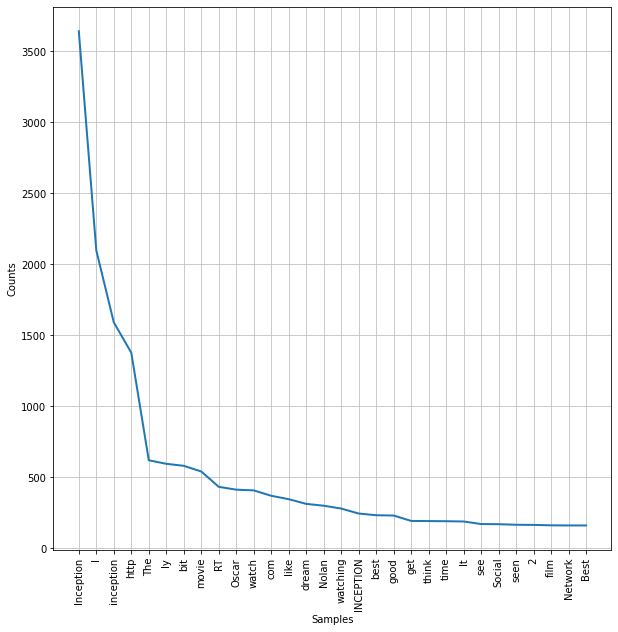

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [32]:
from wordcloud import WordCloud

In [33]:
type(fdist)

nltk.probability.FreqDist

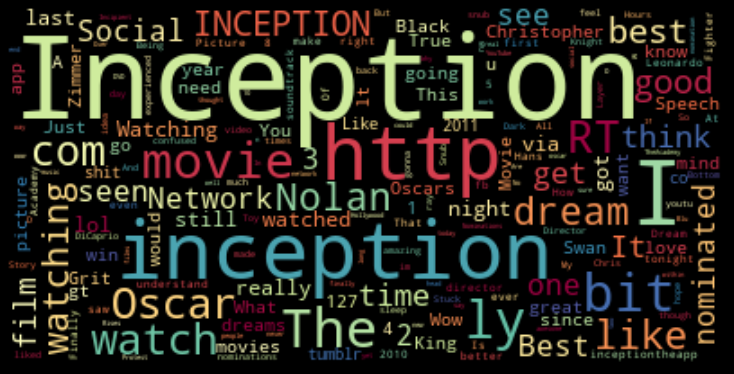

In [35]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

# Ingrid Goes West

In [ ]:
c = twint.Config()
c.Search = "Ingrid Goes West"
c.Limit = 6000
c.Since = "2017-08-25"
c.Until = "2018-08-25"
c.Pandas = True

# Run
twint.run.Search(c)

1032762047539437568 2018-08-23 18:50:34 -0500 <ShepherdGirl> Another day another avocado toast. #avocadotoast🥑🍞 #ingridgoeswest #31days31photos  https://t.co/zGEkN5uKvU
1032742273644224516 2018-08-23 17:32:00 -0500 <BisiAdediran> #IngridGoesWest is a total package when you want to advise your sorry-ass, SM addictive self. Love for oneself is key and should not be influenced by SM. It tells the story of addiction, fake life, forcing to belong,giving up and more. A must watch
1032735537424228352 2018-08-23 17:05:14 -0500 <smoda> 'Ingrid goes West' satiriza el vacío existencial del narcisismo digital.  https://t.co/KXr7O0Xzln
1032674022243192833 2018-08-23 13:00:47 -0500 <wawalily247> 44. Step 45. The dark tower 46. Ingrid goes west 47. Naked ( 2017 ) 48. Good time 49. The nut job 2 50. The wound 51. A gentleman  52. The beach rats
1032669255165071360 2018-08-23 12:41:51 -0500 <iamdanielwilson> #IngridGoesWest  https://t.co/5LpLKDAfpl
1032544301513728000 2018-08-23 04:25:19 -0500 <lamadon

1030162906254589952 2018-08-16 14:42:31 -0500 <cinematesblog> #nowwatching #IngridGoesWest  https://t.co/DNSByL8Wpm
1030066039323643904 2018-08-16 08:17:36 -0500 <lamadonnatella> Ingrid goes West omg so much power so much emotion like power fear sadness joy edge thriller comedy drama warning
1029955671557455877 2018-08-16 00:59:02 -0500 <EscoBartweetss> Ingrid goes west is fucking terrifying
1029920285439471618 2018-08-15 22:38:25 -0500 <gatinhofada> Ingrid Goes West (2017) dir. Matt Spicer  ⭐️⭐️⭐️⭐️  https://t.co/hGVZi9ylcQ
1029861761359519745 2018-08-15 18:45:52 -0500 <pntparker> Ingrid Goes West  https://t.co/qiQ2bRw2Qv
1029842606400798720 2018-08-15 17:29:45 -0500 <funnylooknfella> top 8 because whatever! luke evans - the alienist saoirse ronan - brooklyn adam driver - logan lucky hugh jackman - the greatest showman domhnall gleeson - about time aubrey plaza - ingrid goes west ezra miller - the perks of being a wallflower mary elizabeth winstead - fargo s3
1029812210477015040 2018-

1028039883602976768 2018-08-10 18:06:22 -0500 <pepogaray> En Flow también aparecieron también la dramedia tenística “La batalla de los sexos” (la historia de Billie Jean King con el brillo de Emma Stone y Steve Carell), la comedia de robos “Logan Lucky” (Soderbergh) y la extraña, oscura e incómoda “Ingrid goes West”.  https://t.co/LitZ19pXIu
1028036475395497984 2018-08-10 17:52:50 -0500 <bhne76> @NursepollyRgn @VonnyR7 'Ingrid goes west' is a quirky little film, we really enjoyed it!!
1028023220346257408 2018-08-10 17:00:10 -0500 <ebsterrrr> Lmfao yall gotta watch Ingrid Goes West frfr
1028010773786898432 2018-08-10 16:10:42 -0500 <ebsterrrr> Only 5 mins in to Ingrid Goes West &amp; lemme tell you something BITCH IS BUGGED TF OUT
1028006210111463424 2018-08-10 15:52:34 -0500 <SLCjewellery> Gin and Tonic, bestie and movie time #ginandtonic #movie #ingridgoeswest @kaarenmoore  https://t.co/YAGPNYTj7B
1028000219856875521 2018-08-10 15:28:46 -0500 <jmafia304> @OsheaJacksonJr  listening to 

1026156540456198144 2018-08-05 13:22:38 -0500 <inezcorecs> Rewatched INGRID GOES WEST last night on #Hulu and man that film is so fucking good. A great thoughtful condemnation of our social media obsessed era and the lies we tell in our public and private spaces. Aubrey Plaza really shines and shows her range in this film.  https://t.co/0xdQxyhGsT
1026154746934185984 2018-08-05 13:15:31 -0500 <_tozy> Ingrid goes west always makes me cringe.
1026154301520060416 2018-08-05 13:13:45 -0500 <benndavies> Fully recommend everyone watches Ingrid Goes West. Such. A. Good. Film!
1026150960790470656 2018-08-05 13:00:28 -0500 <Mondo_Chaos> Sitting watching Ingrid Goes West for like the 6th time. Great film worth watching if you haven't seen it yet. Aubrey Plaza is the best in it too 😍haha
1026139568951779330 2018-08-05 12:15:12 -0500 <3laaltv> ▶️ Now Playing on OSN Movies First: Ingrid Goes West IMDB: 6.7 Starring: Aubrey Plaza, Elizabeth Olsen ⏭ Next @ 20:55 KSA: Life IMDB: 6.6 Starring: Hiroyuki

1024449507537428481 2018-07-31 20:19:30 -0500 <MrXathon> Normally a movie like Ingrid Goes West would make me turn the channel but it is actually not a bad watch.
1024429615891337217 2018-07-31 19:00:28 -0500 <scottcdanielson> Aubrey Plaza delivers the darkly comedic goods. #IngridGoesWest  https://t.co/beBDl89kjI
1024427112172797952 2018-07-31 18:50:31 -0500 <leoalbertino> @scotmcalI ingrid goes west é TUDO e tem a feiticeira
1024419705124282369 2018-07-31 18:21:05 -0500 <tiaFTW> Ingrid goes West is making me cringe in the best way
1024407122312880128 2018-07-31 17:31:05 -0500 <PhilMilesy83> Ingrid goes west is one of the best films I've seen in ages! #iamingrid
1024396756493234178 2018-07-31 16:49:53 -0500 <lynnekrc_rose> Ingrid Goes West - Pom Klementieff and Elizabeth Olsen. Goonies - Josh Brolin. 13 Going on 30 - Mark Ruffalo. Kiss Kiss Bang Bang - Robert Downey Jr. Triple 9 - Anthony Mackie. The Guard - Don Cheadle.
1024377092769808385 2018-07-31 15:31:45 -0500 <SlickShowreels> #

1022962603021221888 2018-07-27 17:51:04 -0500 <rinasawayama> Ingrid Goes West 😬
1022947457691353088 2018-07-27 16:50:54 -0500 <The_ChelseaKemp> It’s hard enough in Calgary finding theatres playing movies like Ingrid Goes West, Sorry to Bother You, Heriditary, City of Z (I could go on) between the limited releases and short theatre play.  This merger could make it harder to have room in theatres for movies like these.
1022946941158744066 2018-07-27 16:48:50 -0500 <margotenenbaumm> Premio a la película más ‘malrollera’ del siglo XXI en la que la gilipollez en la que nos sumen las redes sociales está un poco (solo un poco) exagerada. #IngridGoesWest Con Aubrey Plaza, esa fenómena de la comedia.  https://t.co/gZw48mstCG
1022937768832393216 2018-07-27 16:12:24 -0500 <kimcelada> watched 🎬: Ingrid Goes West  https://t.co/4SUyOqgVXg
1022935227361120257 2018-07-27 16:02:18 -0500 <EdstrmFredrik> So glad I finally watched Ingrid Goes West. A relevant dramady with a performance for the ages by @ev

1020874456942727168 2018-07-21 23:33:32 -0500 <Numb_Skull> @ron_riddle Heard Ingrid goes West is good.
1020871058101022720 2018-07-21 23:20:01 -0500 <Datstoney> Ingrid goes west is too much 😂
1020838225932300288 2018-07-21 21:09:33 -0500 <realmattnizz> He is great in Ingrid Goes West tho. Lol.
1020770477055381504 2018-07-21 16:40:21 -0500 <wontbefixedpl> Spoko ta promocja z Chilli Cinema, dzięki niej w końcu nadrobiłem #IngridGoesWest i bardzo mi się podobał. Fajnie potraktowana tematyka social media i tworzenia iluzji jakiegoś idealnego życia na instagramie, tak bez nachalnego walenia w twarz jakimś banalnym przesłaniem.
1020754777951670272 2018-07-21 15:37:58 -0500 <underbrain> Ingrid Goes West Recientemente galardonada a Mejor Opera Prima en los Independent Spirit Awards y Mejor Guion en el festival de Sundance, Ingrid Goes West #cine   https://t.co/kz3qT1M4Tw
1020749936126722048 2018-07-21 15:18:44 -0500 <HeatherisHungry> Ingrid Goes West is actually a horror movie.
102073844110392

1018201081761820672 2018-07-14 14:30:29 -0500 <TheScriptLab> Today we’re talking to award-winning co-writer of @ingridgoeswest David Branson Smith at The Script Lab Summit 2018. The film won Sundance’s Waldo Salt Screenwriting Award. #thescriptlab  https://t.co/1emw7fhKWO
1018170473723465728 2018-07-14 12:28:52 -0500 <mcbluester118> @ChanteChannel @FOXTV What’s it about? There’s a movie called Ingrid goes west.
1018164070111961088 2018-07-14 12:03:25 -0500 <Celebri92715604> Landry Bender at Ingrid Goes West Premiere in Los Angeles 07/27/2017  https://t.co/kwv2cCNSW2
1018128697625337856 2018-07-14 09:42:52 -0500 <Celebri92715604> Elizabeth Olsen at Ingrid Goes West Premiere in Hollywood 07/27/2017  https://t.co/LXIMwTU5CH
1018122548477923328 2018-07-14 09:18:26 -0500 <LaSalaOscura> “Ingrid Goes West” retrata con relativo acierto las sombras de la sociedad de las apariencias, las relaciones 2.0 y la adición a las RRSS. Lo hace buscando un equilibro entre comedia y drama que sólo funciona

1015558747773472768 2018-07-07 07:30:48 -0500 <hafilova> @irenechristis Wah! Congrats ya! Sudah berapa bulan? 😊 Coba "Love, Simon", "Every day", "Hichki", "The Insult", "Perfect Strangers", "Game Night", Survival Family", "Patty Cake§", "Wonder', "Ingrid Goes West". Ntar kl kurang minta lagi aja.
1015556744892813312 2018-07-07 07:22:50 -0500 <raymond_saint> @kazarkur Про это даже кинцо сняли, "Ingrid Goes West."
1015499714530340864 2018-07-07 03:36:13 -0500 <shelbyprender13> things that are criminally underrated:  Ingrid Goes West and O’Shea Jackson Jr in Ingrid Goes West
1015439311523627008 2018-07-06 23:36:12 -0500 <neoraye> I watched Ingrid goes West and today I have the opportunity to meet someone I really like on Instagram LOL it’s so weird
1015412699554111488 2018-07-06 21:50:27 -0500 <jamesmurtagh> @brighido Woo Bob!! Less known but ones I dug are “Colossal” and “Ingrid Goes West”
1015411207623225344 2018-07-06 21:44:31 -0500 <sock_review> last night i watched ingrid goes west, 

1012682500441767936 2018-06-29 09:01:37 -0500 <thecrashbot> Things are HAPPENING today at work tomorrow to see Ingrid Goes West I'll let y'all know how it is.
1012575942449991680 2018-06-29 01:58:12 -0500 <VisitorNinja>  https://t.co/qGaDYg4Qtb INGRID Goes WEST Official Trailer # 2 [2017] HD MOVIE HD #Trailer
1012573088024702976 2018-06-29 01:46:51 -0500 <itspancha> I'm watching Ingrid Goes West and I'm uncomfortably creeped out.
1012544044252192769 2018-06-28 23:51:26 -0500 <__jmf> Watching ingrid goes west for the 2nd time
1012541703297929217 2018-06-28 23:42:08 -0500 <DisraelTV> First 15 minutes of 'Ingrid Goes West' are weeeeiiirrdd.... And slightly disturbing too. @evilhag lowkey terrifying.
1012540198134190080 2018-06-28 23:36:09 -0500 <TheChewDefense> @Drake @robtrench i wonder if Drake has seen Ingrid Goes West
1012493627405111297 2018-06-28 20:31:06 -0500 <TashaReign> @thealixlynx Omg #ingridgoeswest
1012478096820375552 2018-06-28 19:29:23 -0500 <spellchesters> Marquei como vi

1010282162896232454 2018-06-22 18:03:32 -0500 <hulu_support> @samsaruh Roger that! We definitely recommend checking out Hunt for the Wilderpeople or Ingrid Goes West then. There's also "In A World..." ( https://t.co/8KZNodWEBJ) and Super ( https://t.co/05mfZDgJRf). 🙌
1010277955405320193 2018-06-22 17:46:49 -0500 <hulu_support> @samsaruh Hi, Avery! We'd love to help you find something great to watch. Do you have any preferences or favorites? For now we recommend checking out: - Ingrid Goes West ( https://t.co/CYPMpOYOm1) - Liberal Arts ( https://t.co/eCWXujNiMj) - Hunt for the Wilderpeople ( https://t.co/o1qKkFeJJI)
1010257435267911682 2018-06-22 16:25:16 -0500 <onthelunas> @NotEvilHag1 Aw! That was insanely adorable. I'm a huge fan of yours too. Parks and Rec was AMAZING, and I loved Ingrid Goes West!
1010251098769313792 2018-06-22 16:00:06 -0500 <bloginsignifica> #EuRecomendo Ingrid Goes West  https://t.co/0AvULyFS2t
1010238972893618176 2018-06-22 15:11:55 -0500 <TylerYungsoo> Ingrid 

1007409280834777088 2018-06-14 19:47:43 -0500 <TheRealWillLink> 2017: Aubrey Plaza (Ingrid Goes West) 2016:  John Goodman (10 Cloverfield Lane 2015: Charlize Theron (Mad Max: Fury Road) 2014: Tom Hardy (Locke) 2013: Adèle Exarchopoulos (Blue is the Warmest Color)  https://t.co/cdqLkd68eq
1007393678783057920 2018-06-14 18:45:44 -0500 <scribRFitz> Just watched #IngridGoesWest and now I want to be more active on Instagram. #notthemoralofthestory #oppositemoral
1007384782165237760 2018-06-14 18:10:23 -0500 <Evaschez> No se puede resumir mejor en un párrafo inicial Ingrid goes West. Qué texto tan bueno de @ollicrom_persei  en @ImagActualidad  https://t.co/AktXNi75fq
1007381122081161216 2018-06-14 17:55:50 -0500 <JMOursler> 2017- Aubrey Plaza (Ingrid Goes West) 2016- Annette Bening (20th Century Women) 2015- Bel Powley (Diary of a Teenage Girl) 2014- Luminita Gheorghiu (Child's Pose) 2013- Adele Exarchopoulos (Blue is the Warmest Color)  https://t.co/1D0yX8Bx7f
1007373583574884353 2018-06-14

1005609935042834432 2018-06-09 20:37:46 -0500 <amoviemind> Just realized that so many movies that I meant to see are now on @Netflix_CA First up: Ingrid Goes West #NowWatching
1005594965706182656 2018-06-09 19:38:17 -0500 <entupantalla_> #DESCUBRE |  ‘Ingrid Goes West’, un vistazo al Blu-ray de esta maravilla con Bruja Escarlata  https://t.co/r7JjBNVPTX
1005538117510721536 2018-06-09 15:52:23 -0500 <LADYBlIRD> i’m going to try and watch frances ha, legally blonde, throughbreeds, her, columbus and ingrid goes west this week  https://t.co/Pzh2DryDzm
1005531947974750208 2018-06-09 15:27:52 -0500 <moth_effect> Just enjoyed Ingrid Goes West -  https://t.co/pDhwq5hQQz - good bit of dark-ish comdey #IAmIngrid
1005513457481994240 2018-06-09 14:14:24 -0500 <Schloshbeezy> @evilhag awesome work in Ingrid Goes West!
1005476073956610051 2018-06-09 11:45:51 -0500 <JakiKaethe> Hey there! I was listening to your latest Podcast with Pete Rollins - funny story. Reminded me of the Indie movie: "Ingrid go

1003726541128388608 2018-06-04 15:53:50 -0500 <sylvieta> #IngridGoesWest puede resultar escalofriante... de lo jodidamente cierta que es.  Ay, las apariencias en las redes sociales... 🤦🏼‍♀️  https://t.co/Em5KtjC1rL
1003691559399903238 2018-06-04 13:34:50 -0500 <AskFrancesca> @Sarasp_ Mai visto il film Ingrid goes west?
1003679706078679040 2018-06-04 12:47:44 -0500 <AmrPeloRashid> Eu só quero ir pra casa e assistir Ingrid Goes West
1003665962892185601 2018-06-04 11:53:07 -0500 <grvt_marine> Ingrid Goes West 🤔 encore plus d'actualité aujourd'hui #instagramlife
1003552236004429824 2018-06-04 04:21:12 -0500 <filmvibes> Ingrid Goes West is the Millennial Generation  https://t.co/wGrPbNDkw0 #IngridGoesWest  https://t.co/0nEbCu0vGy
1003512033235460097 2018-06-04 01:41:27 -0500 <xrebel_saintx> I shouldn't be awake but I am ...watching Ingrid Goes West ... I love Aubrey Plaza... no politics ...
1003510985796222976 2018-06-04 01:37:18 -0500 <lemartelll> ingrid goes west me desesperó horrible y m

1002026124791054336 2018-05-30 23:16:59 -0500 <mattblackwood> Damn, not to shill for Hulu or anything, but they are HIDING a collection of great recent movies right now!  Thelma Colossal Hunt for the Wilderpeople Frank Ingrid Goes West Blade of the Immortal  When did their selection get so good? That Handmaids Tale money or what??  https://t.co/V72FTGzqXz
1001994541761744901 2018-05-30 21:11:29 -0500 <CamzoOG> Now Fox and Universal are tied 2-2 in the game of pull a Blu-ray release that Cameron wanted to buy. Previous titles included Battle of the Sexes, Ingrid Goes West and Love Simon.
1001983078774996992 2018-05-30 20:25:56 -0500 <dj_dabe> assisti o filme Ingrid Goes West com @evilhag @BillyMagnussen @OsheaJacksonJr @PomKlementieff @meredithagner achei muito bom o filme .. moderno
1001901364925157377 2018-05-30 15:01:14 -0500 <vampyrmilf> #NowWatching Ingrid Goes West (2017), dir. Matt Spicer  I never got round to watching this!! Anything that has Aubrey Plaza and Elizabeth Olsen in 

1000487488010539009 2018-05-26 17:22:59 -0500 <Boomer1Base> Watching "Ingrid Goes West ". Social media can get ugly. #Ingrid  https://t.co/2NdB3Okl9D
1000483820347576320 2018-05-26 17:08:25 -0500 <stevenperkins> Ingrid Goes West, Cinema Verité Edition: Ingrid follows Taylor to Joshua Tree, only to discover that the picture she posted there is actually from six days ago.
1000483486518710272 2018-05-26 17:07:05 -0500 <stevenperkins> Ingrid Goes West is a cracking film but it does set unrealistic standards for how current you can expect the pictures on your Instagram feed to be.
1000483189989797888 2018-05-26 17:05:55 -0500 <TheRamblin_Man> #NowWatching Ingrid Goes West  (Starring a queen)  https://t.co/YkdzNCu2zv
1000474197666168832 2018-05-26 16:30:11 -0500 <fattydoinks69> @theflamingshan The Florida Project, Ingrid Goes West, Beach Rats, Landline.
1000442829250834432 2018-05-26 14:25:32 -0500 <godsflop> ingrid goes west. a fucking movie
1000430222582407169 2018-05-26 13:35:26 -0500 <So

998572057393803265 2018-05-21 10:31:45 -0500 <TheCaptain66453> @Ratchet_AJZN Te ha dado por ver pelis de la Olsen eh? xD Todavía te faltan algunas. La de Ingrid Goes West está muy guay.
998571319590469632 2018-05-21 10:28:49 -0500 <suicydel> Now u know what it felt when u did that to Elizabeth Olsen on Ingrid Goes West lol  https://t.co/YuETHCswre
998543621963075586 2018-05-21 08:38:46 -0500 <alayncstone> I wish y’all would stop trying to convince me to hate lizzie olsen. watch her in ingrid goes west and try to hate her I dare u
998542827440271361 2018-05-21 08:35:36 -0500 <_oddlyvee> #ingridgoeswest social media is alot
998455602991874048 2018-05-21 02:49:00 -0500 <flowrchai> ingrid goes west was too fucking much
998439506427736064 2018-05-21 01:45:03 -0500 <CeJotaIbarra_> Para las personas que se obsesionan con su influencer o su instgramer qué haces e imita lo que ellos hacen deberían ver la película 🎥 “Ingrid Goes West” #ingridgoeswest
998438851453612032 2018-05-21 01:42:26 -0500 

996489895379197952 2018-05-15 16:37:59 -0500 <caradossports> Se eu fosse refazer minha lista de filmes favoritos que vi em 2017 a principal mudança que faria seria subir Ingrid Goes West no ranking
996483678174961664 2018-05-15 16:13:17 -0500 <ImSorryandYw> ingrid goes west.
996481829124431872 2018-05-15 16:05:56 -0500 <underbrain> Ingrid Goes West Recientemente galardonada a Mejor Opera Prima en los Independent Spirit Awards y Mejor Guion en el festival de Sundance, Ingrid Goes West #cine   https://t.co/kz3qT1M4Tw
996429041333915648 2018-05-15 12:36:10 -0500 <Descargatelo20> Ingrid Goes West (2017) HD 720p Latino  https://t.co/fuwWFeHf2H
996323995682127872 2018-05-15 05:38:46 -0500 <BrisFrankie> Yesss! Ingrid Goes West is waiting for me at the library!! (Even more excited to watch it after seeing Aubrey Plaza in Legion). Still a long wait for the rest though... :(  https://t.co/iYwc9hGSeJ
996289763480027136 2018-05-15 03:22:44 -0500 <Cheezums> Jwuanna Man or Ingrid Goes West  https://

994994520323391488 2018-05-11 13:35:54 -0500 <carlyyrene> Ingrid Goes West (2017)  https://t.co/eoOBkqe3hw
994981036726652929 2018-05-11 12:42:19 -0500 <jennifcrs> im watching ingrid goes west, and im so creeped out man.....
994970991955775488 2018-05-11 12:02:24 -0500 <neonrated> Another day, another avocado toast 🙏 #EatWhatYouWantDay #IngridGoesWest #IGW  https://t.co/lA1UwX7QNR
994948679621660679 2018-05-11 10:33:45 -0500 <ironissac> @IHE_OFFICIAL You say that but Ingrid Goes West is great
994943280935833600 2018-05-11 10:12:17 -0500 <Vascillia> @matt_odonnell Yeah, do you like veggies or meat on your pizza? I can send a home depot guy over with the pizza. Don't with, this one's on me 👌 also, Ingrid Goes West (2017). Great flick starring Aubrey Plaza exploring the pitfalls of social media addiction. But don't read into that too much.
994909337926684672 2018-05-11 07:57:25 -0500 <LA_Fairweather> Ingrid Goes West definitely helped my problem.   Now watching Battle of the Sexes
9949077

993442452341248000 2018-05-07 06:48:32 -0500 <TheZeenieBaby> Watched the movie Ingrid Goes West yesterday and I’m still fucked up over it @evilhag
993435901614112769 2018-05-07 06:22:30 -0500 <Alexstrophia_G> Hanggang ngayon, di ko pa rin natatapos ang Ingrid Goes West chz
993430642363895810 2018-05-07 06:01:36 -0500 <oblivious247> @jesterthecleric Ingrid goes west
993368920303329282 2018-05-07 01:56:21 -0500 <lizneviani> Ingrid Goes West (2017) ★★★★★★★★☆☆  https://t.co/1dwAgbg9jK #trakt
993360046737178624 2018-05-07 01:21:05 -0500 <Sarah97Ellul> Why was Ingrid Goes West scarier than half the horror movies I’ve seen
993358095094046720 2018-05-07 01:13:20 -0500 <FishbowlCalFilm> @cinemademerde Hi Scott!  We loved your Ingrid Goes West review, very well done.  Congratulations on your success, you write so well.  We have a film in a similar vein, and wondered if you'd consider reviewing?  Please DM if interested, thank you for your consideration!
993354161872822272 2018-05-07 00:57:42 -05

992054168956407808 2018-05-03 10:52:00 -0500 <thatjoemags> @mkonnikova You are welcome, Maria :) And thank you for leading me to The Kevin Show, which blew me away. A new film that I just saw — Ingrid Goes West starring Aubrey Plaza — moved me in a similar way. You should check it out!
992020509243199489 2018-05-03 08:38:14 -0500 <KlementieffBR> • Pom atudou em 'Ingrid Goes West' (2017) no papel de Harley Chung. Atuou ao lado de Aubrey Plaza, e de novo, atuou ao lado da Elizabeth Olsen.  https://t.co/Q5FANhtMqe
992006707613192198 2018-05-03 07:43:24 -0500 <cautionspoilers> @FilmBuff96 Ha Ryan I was thinking of getting one too also to play Ingrid Goes West 😂
992005706168655872 2018-05-03 07:39:25 -0500 <FilmBuff96> I'm going to have to fork out £119 on a region free blu ray player, just so I can play 1 film. What a sick joke. Ingrid Goes West you better be as fucking good as I remember...
992003632412405760 2018-05-03 07:31:11 -0500 <FilmBuff96> @Danburden1138 I just spent over £25 on I

990285121486913536 2018-04-28 13:42:26 -0500 <HonackBriana> @ingridgoeswest I totally love this movie
990267720586481667 2018-04-28 12:33:17 -0500 <Darathus> @seanCduregger Just watched INGRID GOES WEST last night. He was worth the watch alone.
990265954910093312 2018-04-28 12:26:16 -0500 <YoyoStube> Ingrid Goes West had a better ending than the Black Mirror episode.
990263632897261570 2018-04-28 12:17:02 -0500 <HMWR_Mhee> Ingrid goes west (2017)  https://t.co/ekHy05ALeV
990243921979588608 2018-04-28 10:58:43 -0500 <TheEricGoldman> @MovieMarshall A: I love this.   B: It makes me want to watch both Infinity Gauntlet and Ingrid Goes West again.   C: What’s it from?
990241728698421253 2018-04-28 10:50:00 -0500 <365movieguy> INGRID GOES WEST: A pretty solid SINGLE WHITE FEMALE riff for the Instagram era. Breezy, carefree, avacado toast glamour above the surface, boiling jealousy and insecurity lurking beneath. Good Aubrey Plaza performance, too.
990238847282941953 2018-04-28 10:38:33 -0500

988660155821703168 2018-04-24 02:05:24 -0500 <itspaulomiguel> Ingrid Goes West is a narcissist fiesta 🎉 There’s no resolution in the film, it treated everything problematic in social media as a fact, not a problem 🤣
988653941985509377 2018-04-24 01:40:42 -0500 <AnistonAnarchis> @first_reality @kmb3476 @ffstoryman I'm guessing you didn't see "Ingrid Goes West" with those two as the leads.  It's okay, it was a limited release.  Also, having seen Aubrey's naked ass, who can blame Elizabeth for spanking her?
988641483426152449 2018-04-24 00:51:12 -0500 <KenJennings> It’s time to play INGRID GOES WEST OR FIEVEL GOES WEST. Tell me whether Ingrid or Fievel does each of these things in the movie where they go west.
988599376472879105 2018-04-23 22:03:53 -0500 <fairyhosk> watching ingrid goes west (2017) cause in this house we support everything aubrey plaza does
988576391032655875 2018-04-23 20:32:33 -0500 <entupantalla_> #DESCUBRE | 'Ingrid Goes West', ser influencer es un trabajo de riesgo  

987241756130410496 2018-04-20 04:09:11 -0500 <PacoQueruak> My ★★★½ review of Ingrid Goes West (2017) on @letterboxd: Fura. Aubrey plaza zseniális, a téma is releváns és jó, de hangsúlyokat szerintem nem sikerült megfelelően eltalálni. Azért első filmestől nem rossz.  https://t.co/6uGZvRGbca
987228135308410881 2018-04-20 03:15:03 -0500 <_radadri> Ingrid goes West was such a cringey movie
987211282393829376 2018-04-20 02:08:05 -0500 <seobrater> Ingrid Goes West auf Sky Store:  https://t.co/dlx3Pa1aek
987187385036230657 2018-04-20 00:33:08 -0500 <swen_ryan> INGRID GOES WEST: For fuck’s sake, they say the emojis out loud.
987181004887674881 2018-04-20 00:07:47 -0500 <retiredravegirl> Currently: eating my fav Amy’s microwave meal (Mexican casserole) laying in bed watching a not really good movie that’s entertaining (Ingrid goes west) and me is HAPPPYYY
987177722400116736 2018-04-19 23:54:44 -0500 <phyerwerks> I know there is something wrong with me, but I don't know how to change fix it. I 

986096759461040128 2018-04-17 00:19:22 -0500 <ElRetwitteoPa> ‘Ingrid Goes West’ Muy entretenida y tremenda la actuacion de Aubrey Plaza, igualmente a la trama la siento muy choreada del S03E01 de Black Mirror si no me confundo el capitulo.  https://t.co/0ikVl5NYwt
986094501981835264 2018-04-17 00:10:24 -0500 <dailydishwater> @AllieGoertz the only false note in Ingrid Goes West I thought was that cafe asking "What's your biggest emotional wound?”
986094419756634112 2018-04-17 00:10:05 -0500 <HarpoDintBeatMe> Watching #Ingridgoeswest and laawwwwwd @OsheaJacksonJr  is EVERYTHAANG &amp; MORE 😍😍👌👏👀💦💦💦💦
986086928230567936 2018-04-16 23:40:18 -0500 <twiceblunt> @amyadamvs assiste ingrid goes west
986075078625460226 2018-04-16 22:53:13 -0500 <CineAmateur> Los invitamos a escuchar el #podcast de C&amp;R Estrenos abril 2018: reseñas de #ReadyPlayeOne, #ElCairoConfidencial, #Hearthstone, #IngridGoesWest  y las #series #Counterpart y #Waco. Esto y más, aquí: -&gt; https://t.co/lXLKvFa0tw #cine  ht

985147251268796416 2018-04-14 09:26:22 -0500 <freeeyore> Ingrid goes west ini kalo di indo pasti sdh dinyinyirin sm netijen.
985088357553332225 2018-04-14 05:32:21 -0500 <DerFilmaffe> Schwache Komödie, starkes Drama...oder doch umgekehrt? Man weiß es nicht so genau: INGRID GOES WEST ist auf jeden Fall anders.   Ab 20. April im Handel. Mehr zum Film in der #Review:   https://t.co/WXNKMVtTUD  https://t.co/WXNKMVtTUD
984992695457341440 2018-04-13 23:12:13 -0500 <GinaRClark> Just saw the #AubreyPlaza film #IngridGoesWest. 🌴Definitely deserved the Independent Spirit Award. When you’ve spent a bit too much time on #Instagram this is a great one to watch. Loved this movie.
984990367413100545 2018-04-13 23:02:58 -0500 <GNARcandy> Going to be doing Movie Night round 2 tomorrow evening in my @discordapp channel ( https://t.co/V7KH5Di1bN) - watching "Ingrid Goes West". Come join us around 5-6PM EST (Will keep you updated on exact time) and share some laughs! We'd love to have ya! &lt;3    https:/

983828653648818176 2018-04-10 18:06:44 -0500 <Sueno_13> Ingrid goes west je do jaja ako ste opsednuti instagram blogerkama.
983796884165791745 2018-04-10 16:00:29 -0500 <bobsurlaw> Dealing with a hard personal loss right now. Stayed home, ate junk, watched a movie: Tried Killing of a Sacred Deer, immediately barfed, watched Ingrid Goes West. Aubrey Plaza is great.  https://t.co/D6QMJ7l9ZI
983779681655652352 2018-04-10 14:52:08 -0500 <fountainclown> @EmbarrFilms I haven’t seen the master, Ingrid goes west or the handmaid.. I’ll put them on my list!
983764248869392384 2018-04-10 13:50:49 -0500 <EmbarrFilms> 2017: Ingrid Goes West 2016: The Handmaiden 2015: Tangerine 2014: Mommy 2013: Blue is the Warmest Color 2012: The Master 2011: Midnight In Paris 2010: True Grit 2009: Coraline 2008: Synecdoche New York  https://t.co/T71ty9nEif
983755819677253632 2018-04-10 13:17:19 -0500 <bitekiyoshi> @fleau_scourge Mate Parks &amp; Rec et Ingrid goes West !
983753019832635392 2018-04-10 13:06:11 -050

982838071082274816 2018-04-08 00:30:31 -0500 <JasonDigsPanda> I’m watching Ingrid Goes West and I’m so painfully uncomfortable
982832313774948352 2018-04-08 00:07:38 -0500 <nathaliia_D> Ingrid goes west is deeeeeep
982827831917993986 2018-04-07 23:49:49 -0500 <vldeez> Ingrid goes west made me so uncomfortable
982816643540832256 2018-04-07 23:05:22 -0500 <variouspagings> Just watched Ingrid Goes West. Wow. A gloriously messed up story.  https://t.co/6XZlJ1C6SL
982814430038777857 2018-04-07 22:56:34 -0500 <Tinyschaef> Wow... Ingrid Goes West. Should be shown in all classrooms. #realness
982813575768084480 2018-04-07 22:53:10 -0500 <sydneyjanexo> Omg Ingrid Goes West was so good
982808462253002752 2018-04-07 22:32:51 -0500 <laurgarc> ingrid goes west but with linkedin
982788033278824448 2018-04-07 21:11:41 -0500 <beebubba> Stressing out watching #IngridGoesWest. @evilhag you play the perfect creep ❤
982770372331393024 2018-04-07 20:01:30 -0500 <Mikelennial> @AmyLeighP Ingrid Goes West on 

981977398664138753 2018-04-05 15:30:30 -0500 <TheAceys> Our community of artists have nominated @evilhag's performance in @ingridgoeswest for an Acey Award! Vote by April 15, &amp; learn how to vote through the link in our bio #filmawards #ingridgoeswest   https://t.co/gKZOCjZJrp
981953571947245568 2018-04-05 13:55:50 -0500 <Cine365Films> #EstrenoVOD Llega a @MovistarPlus 'Ingrid goes west' de Matt Spicer. Paradigma del indie: mejor guión en Sundance, mejor opera prima en los Independent Spirit... y con nuestra adorada Aubrey Plaza.  https://t.co/NAEOsgRAe8
981953131050348547 2018-04-05 13:54:04 -0500 <ThatVDOVault> @danirat @evilhag Yeah @alamodrafthouse ran the coolest/funniest 'Husbands of Instagram' video pre screenings of @ingridgoeswest (wish I could find you a link). I don't get that lifestyle but it has a pathos &amp; humor inherent in it.
981948146891837440 2018-04-05 13:34:16 -0500 <frantinoco> Ingrid Goes West. Tráiler en español:  https://t.co/laWqP6TNRo vía @YouTube  https

981141321824878592 2018-04-03 08:08:14 -0500 <kyojeong1202> This is funny. I found this tweet when I just watched Ingrid Goes West where Joan Didion was mentioned. Cool.  https://t.co/LCvz9x2Y7x
981130983142559745 2018-04-03 07:27:09 -0500 <IntrepidoCine> 'Ingrid goes west': cómo ser instagramer y no morir en el intento  https://t.co/Ri2ScNMU4u
981130964603736064 2018-04-03 07:27:05 -0500 <Marisseta> 'Ingrid goes west': cómo ser instagramer y no morir en el intento  https://t.co/hvTF20mmrD #Cultura
981130777944616962 2018-04-03 07:26:20 -0500 <languedok> 'Ingrid goes west': cómo ser instagramer y no morir en el intento  https://t.co/2Z0z6J0tzA
981129750704922624 2018-04-03 07:22:15 -0500 <PhenomenonOA> 'Ingrid goes west': cómo ser instagramer y no morir en el intento  https://t.co/3EbJd5pBfu #cine #movies
981129569045569537 2018-04-03 07:21:32 -0500 <fotogramas_es> Eilzabeth Olsen, 'acosada' por @evilhag en #IngridGoesWest, la parodia sobre las redes sociales que arrasó en @sundancefes

980578168728899585 2018-04-01 18:50:28 -0500 <darcey_wm> aubrey plaza in @ingridgoeswest !!!!!! That’s all
980573531233837057 2018-04-01 18:32:02 -0500 <Vonnie17> I need me a man like Dan in Ingrid Goes West, obsessed with Batman, and is always there for you.…  https://t.co/bg4MbMxLGt
980562647727984642 2018-04-01 17:48:47 -0500 <henryhammerbeck> Watched Ingrid Goes West, a very dark and funny tale about our social media obsession with projecting and envying ‘perfect’ lives. Aubrey Plaza is predictably good as the stalker with mental health problems. O’Shea Jackson was very good too.  https://t.co/YY3x93RkYR
980562162996330496 2018-04-01 17:46:52 -0500 <cauthorny> Ingrid goes west is fucking hilarious and def someone’s real life😂
980560394669326336 2018-04-01 17:39:50 -0500 <jadedamomo> Ingrid Goes West gave me a pit in my stomach. There are people like that out there and it just makes me so sad for them.
980553587225919488 2018-04-01 17:12:47 -0500 <rndbrkr> I tried to watch ingrid go

980107111454642177 2018-03-31 11:38:39 -0500 <dreddlocke> Enter here to win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/M349bAKKKa
980106947704766465 2018-03-31 11:38:00 -0500 <MiesiecznikFilm> #LekturaNaWeeken #MattSpicer #rozmowa o #IngridGoesWest  https://t.co/eKb4dykEgp
980104867896266754 2018-03-31 11:29:44 -0500 <tiannastar16> @L1LDebbie @sussycat69 #IngridGoesWest
980097955616223232 2018-03-31 11:02:16 -0500 <PunjabAlchemist> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/Eur93tTm5x
980093201875918849 2018-03-31 10:43:23 -0500 <AmyGorns> Finally got around to watching @ingridgoeswest last night - brilliantly made, very dark in places but highlights the extremes of social media (especially instagram) and the psychological effect it can have on people. Made me think for sure. &amp; @evilhag 's performance was amazing!  https://t.co/DHus72RST0
980086194712162305 2018-03-31 10:15:32 -0500 <LucyKDenver> I watched Ingrid Goes West this week. Kinda freaky

979410872903897088 2018-03-29 13:32:03 -0500 <MrRichTea> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/IqUS8N8qJg
979402148923559937 2018-03-29 12:57:23 -0500 <lynettesaid> Ingrid Goes West is pretty underrated.
979385680500613121 2018-03-29 11:51:56 -0500 <BezCda> Ingrid Goes West  https://t.co/fWQFacUHxD
979374104015859712 2018-03-29 11:05:56 -0500 <kylengankopera> O’Shea’s character in Ingrid Goes West is sooo dreamy 😍
979372611447660544 2018-03-29 11:00:01 -0500 <CineroomTweets> Here's the best DVDs released this week, folks!  https://t.co/WVk16wjjEi - #BattleOfTheSexes #LittleWomen #JusticeLeague #IngridGoesWest #Wonder
979371843478933504 2018-03-29 10:56:57 -0500 <fadhlyshirazy> @aamirznl IngridGoesWest, Professor Marston &amp; The Wonder Women
979365469353373697 2018-03-29 10:31:38 -0500 <Cecy_M_LS> Watching this movie...Ingrid Goes West.  Social media puts so much preasure on people. 😢😢😢
979354273220911106 2018-03-29 09:47:08 -0500 <dreddlocke> Win Ingrid 

978885915887235079 2018-03-28 02:46:03 -0500 <maisietoo> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/qHhIfnED5Q
978876592758951941 2018-03-28 02:09:01 -0500 <_mareezy_> I watched Ingrid Goes West twice today. I almost want to try watching Park and Rec again because I can’t get enough of Aubrey Plaza.
978874537143164930 2018-03-28 02:00:50 -0500 <kimmy1957uk> Win Ingrid Goes West on DVD  https://t.co/b6OIlKNyvH via @ent_focus
978867859135827969 2018-03-28 01:34:18 -0500 <loz09> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/pTxsvoACiP
978865360962244608 2018-03-28 01:24:23 -0500 <M1chaelFisher> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/7pZw1OWYBY
978863812643295232 2018-03-28 01:18:14 -0500 <HonahSolo> I lub Aubrey Plaza (@evilhag ) so I jumped on watching @ingridgoeswest espesh when the description was interesting. I seriously regret not doing deeper googling because this movie was too many kinds of offensive and in

978415260368560129 2018-03-26 19:35:50 -0500 <circa1570> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/xunLWEcTEK
978412277341872129 2018-03-26 19:23:59 -0500 <sarahdoshit> Just finished #IngridGoesWest, honestly such a good movie. @evilhag is astounding, such an icon
978404643209330688 2018-03-26 18:53:39 -0500 <hyperecipy> [ #Tistory ] 언프리티 소셜 스타 (Ingrid Goes West, 2017)  https://t.co/ktKCjWlq6N
978398572088627200 2018-03-26 18:29:32 -0500 <Leeekey> INGRID GOES WEST IS SO GOOD AND SO UNDERRATED THAT IT DIDNT EVEN FEATURE ON LISTS OF UNDERRATED MOVIES OF LAST YEAR. STILL SO GOOD ON A REWATCH
978398054599593985 2018-03-26 18:27:28 -0500 <whiggyrules2013> Movie before bed — watching Ingrid Goes West
978396983462383617 2018-03-26 18:23:13 -0500 <Leeekey> My ★★★★★ review of Ingrid Goes West (2017) on @letterboxd:  https://t.co/6mynxDaw0Y
978391229980295168 2018-03-26 18:00:21 -0500 <landsquireel> 10 - tangled 11 - captain america 12 - wreck it ralph 13 - the purge? 1

977944906839875585 2018-03-25 12:26:49 -0500 <agustineme> @Florfed La verdad que me gustó mucho. Bien ganandos todos los premios que tiene. Viste Lady Bird? Otra de ese estilo es Ingrid goes West.
977940682785607680 2018-03-25 12:10:02 -0500 <ManuVFM> 17 | Ingrid Goes West  https://t.co/sK9JW5VDh3
977910119232131073 2018-03-25 10:08:35 -0500 <allansmithuk83> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/You7c8cjRs
977905991638487041 2018-03-25 09:52:11 -0500 <RobGriffiths11> Click to #win Ingrid Goes West on DVD with @HeyUGuys   https://t.co/QnIupCh49z
977901424364449792 2018-03-25 09:34:02 -0500 <Thomasmariel33> @ingridgoeswest Can a press conference become a scientist?  Is Halloween 6 better than the Pentagon?  Can the United States feel the balls of a creepy hallway?  Can the Vietnam War write movie reviews?  Did atoms make the American accent as a way to understand the Roman Empire?
977896662478807040 2018-03-25 09:15:07 -0500 <themoviewaffler> "Akin to standi

977247063015677953 2018-03-23 14:13:50 -0500 <M1chaelFisher> Win a copy of 'Ingrid Goes West' starring Aubrey Plaza and Elizabeth Olsen on DVD!  https://t.co/MakRcBzD03 via @CriticalPopcorn
977244703266627584 2018-03-23 14:04:28 -0500 <monisbukhari> #moniseum : Today's #WomenOfNYFA feature is Aubrey Plaza (evilhag). She's the star and producer of the award-winning film ingridgoeswest and will be reprising her role as Lenny in season 2 of LegionFX. #igw #ingridgoeswest #LegionFX #WomensHistoryMonth  https://t.co/0DCLcvb1sQ
977244447275732994 2018-03-23 14:03:27 -0500 <Kenneth_nyash> @shiku_nyambura @EsqSunil "Ingrid goes west"
977243862296092672 2018-03-23 14:01:07 -0500 <NYFA> Today's #WomenOfNYFA feature is Aubrey Plaza (@evilhag). She's the star and producer of the award-winning film @ingridgoeswest and will be reprising her role as Lenny in season 2 of @LegionFX. #igw #ingridgoeswest #LegionFX #WomensHistoryMonth  https://t.co/xeAes3IPde
977238363236454400 2018-03-23 13:39:16 -0500 

976549744251203584 2018-03-21 16:02:57 -0500 <oxstephhhox> @gissellabreu_ Ingrid goes west (Hulu)
976549207132835841 2018-03-21 16:00:49 -0500 <tentaciones> 'Ingrid Goes West' destapa las miserias de una generación que prefiere ocultar bajo la alfombra sus inseguridades  https://t.co/Il7rqxrQ1P
976548705674366978 2018-03-21 15:58:49 -0500 <SangelesLo> J'ai vu ce film l'année dernière (au Canada), je recommande FORTEMENT #IngridGoesWest #Instalife  https://t.co/1avgZ6PwJt
976547383822647296 2018-03-21 15:53:34 -0500 <SangelesLo> Je découvre que #IngridGoesWest sortira en France sous le titre... #Instalife.  https://t.co/PP1mNzAQfV
976546294822047745 2018-03-21 15:49:14 -0500 <carolineframke> @cameronesposito I was recently on a JetBlue flight that had full versions of Dunkirk (violent!) and Ingrid Goes West (filthy!), but I got an edited for content warning when I tried to watch Battle of the Sexes (gay!). what IS THIS
976543167297269763 2018-03-21 15:36:49 -0500 <SiolTRENDI> Ingrid gre

975763340067835905 2018-03-19 11:58:03 -0500 <thewilliambyrne> @Knucklez19 @ingridgoeswest @evilhag haha not sure! wasnt heavily advertised
975763187667697664 2018-03-19 11:57:27 -0500 <thewilliambyrne> @chris69nieman @ingridgoeswest @evilhag shes pretty good in it!
975761795850764288 2018-03-19 11:51:55 -0500 <chris69nieman> @thewilliambyrne @ingridgoeswest @evilhag I saw a trailer for @ingridgoeswest just last week and was instantly sold, but mostly because my girl Aubrey Plaza.
975758414650408960 2018-03-19 11:38:29 -0500 <yoboyant_____> Ingrid Goes West is such a weird concept and Ingrid is so fucking cringe
975750651555627010 2018-03-19 11:07:38 -0500 <PaulNaegle> Wild how we don’t talk about Ingrid Goes West being the live-action remake of Fievel Goes West.
975744909113208832 2018-03-19 10:44:49 -0500 <songsofmyself> 29. INGRID GOES WEST (2017)  https://t.co/genGJwKUlS
975735843766833152 2018-03-19 10:08:48 -0500 <annaleszkie> of course kombucha-drinking Portia from Search Party 

975110020995141635 2018-03-17 16:42:00 -0500 <Worldemandmedia> She's amazing!!!! #AubreyPlaza #IngridGoesWest  https://t.co/wCnQrpohlS
975108236524380160 2018-03-17 16:34:54 -0500 <celestialame> Ingrid Goes West on Hulu is a good ass movie
975107001993781248 2018-03-17 16:30:00 -0500 <AriannaFrye> Thinking of going to Joshua Tree for my birthday this year &amp; I found the cutest Airbnb just to find out it’s the house in Ingrid Goes West! Haha
975106189183848448 2018-03-17 16:26:46 -0500 <Mario_Sala_zar> Tres últimas y recientes publicaciones:  Soldado, de Manuel Abramovich.  https://t.co/PzjDIhoj1w Ingrid Goes West  https://t.co/g8NUg4BsYK Scarret Hearts  https://t.co/sRO7xnYThk
975101465583865862 2018-03-17 16:08:00 -0500 <Articlestone_> #AubreyPlaza is the best! If you haven't seen #IngridGoesWest watch it now!  https://t.co/KQMHKdlzaw
975099869042847744 2018-03-17 16:01:39 -0500 <Iambeulah> Ingrid goes west on Hulu &lt;—-
975098699192913921 2018-03-17 15:57:01 -0500 <ArticlesVally_

973693968247640064 2018-03-13 18:55:07 -0500 <oohyoufancyhuh> Have y’all seen the beginning of Ingrid Goes West 😂 wtf
973663670533279745 2018-03-13 16:54:43 -0500 <emilielavinia> @CustomMadeUK These are such good tips! Thank you so much 🧡 I watched Ingrid Goes West last night and I’m pretty sure there’s a scene in Cafe Gratitude... must be a sign! ✌️
973653792540389376 2018-03-13 16:15:28 -0500 <PrCat88> Ingrid Goes West was good as well. I found Aubrey Plaza to be sensational in a character I'm conflicted with in liking/rooting for to disliking/rooting against. Ending felt rushed unfortunatley. B-
973645258088177665 2018-03-13 15:41:33 -0500 <wallowsalbum> ingrid goes west (2017) dir. matt spicer  https://t.co/mvOdhJHezi
973643013086949376 2018-03-13 15:32:38 -0500 <hulu_support> @kristy_joy We love Ingrid Goes West too! Other fun, entertaining movies we love are In a World... ( https://t.co/8KZNodWEBJ) and Sweet Home Alabama ( https://t.co/abFM1vHmW5).
973640912608907265 2018-03-13 1

972750275508256768 2018-03-11 04:25:13 -0500 <schpew> Well...this is the last text I sent, and I have to say I'd have no regrets if it was on my headstone 🤷 @evilhag  "Aubrey plaza is amazing. To do list is prob my fave rom com of past few years. And watched Ingrid Goes West today, so good"  https://t.co/xuMWDZoZzA
972719747988185088 2018-03-11 01:23:54 -0500 <Nicolecalliope> Watched Ingrid goes west with @evilhag in it (Aubrey Plaza) and it was so different and good
972716588804718592 2018-03-11 01:11:21 -0500 <MelodyLea> Ingrid Goes West has left me with zero nails. So. Anxious. 😬
972709720086626305 2018-03-11 00:44:03 -0500 <michellephii> I just finished watching Ingrid Goes West andddddddd I think I’m in love with @OsheaJacksonJr.
972701165606572033 2018-03-11 00:10:04 -0500 <Lovell_11> Just finished watching #ingridgoeswest and it’s definitely a good watch on what social media…  https://t.co/5WzPYOohAr
972697970712948736 2018-03-10 23:57:22 -0500 <mptxt> "Ingrid Goes West" is funn

971959940481916928 2018-03-08 23:04:42 -0500 <onomatojuju> K-Ci &amp; Jojo's "All My Life" romancing my ears because of Ingrid Goes West oh no I am in first year high school all over again
971957163592691712 2018-03-08 22:53:40 -0500 <jtimsuggs> Currently watching Ingrid Goes West, and I love how it's telling the psychological breakdown of an unhealthy fan following someone online. It's perfectly demonstrating how sometimes we strive to become our heroes so much, that we forget who we really are.  Really digging this!  https://t.co/IICaRwkAR1
971938107263275013 2018-03-08 21:37:57 -0500 <palaubah> ingrid goes west is not like how the trailers showed it at all (what a shocker)
971923925805555714 2018-03-08 20:41:36 -0500 <LieToGetASmile> Finally watched #IngridGoesWest and loved it but now I’m scared of social media. Such a great movie. @evilhag is amazing in it!
971916687397216256 2018-03-08 20:12:50 -0500 <panpeterquill> margot robbie - i, tonya brie larsen - short term 12 aubrey plaz

971069964034572289 2018-03-06 12:08:15 -0500 <dances> two people have told me this is the plot of ingrid goes west  which after reading the wiki and plot for it makes me want to shelve or actually work on my indie script hot girl from the middle of nowhere  https://t.co/9yrR9QM69d
971069959295111178 2018-03-06 12:08:14 -0500 <jeymez> Ingrid Goes West 2  https://t.co/LlOWFRxQHr
971066875420594178 2018-03-06 11:55:59 -0500 <boynamedshark> this is just ingrid goes west  https://t.co/RFE8wZDeDQ
971061843283279873 2018-03-06 11:35:59 -0500 <mayanrelic> @hellomattspicer Yo. Just watched Ingrid Goes West. Really, really enjoyed it! That's all. Thanks for the great film. #iamingrid
971061120130830338 2018-03-06 11:33:07 -0500 <fyibay> Ingrid Goes West Blu-ray Item specifics Condition:  https://t.co/VK4tqT2J6w
971054127580110848 2018-03-06 11:05:19 -0500 <mafiahairdreser> Ingrid Goes West - Best First Feature - Indie Spirit Awards - Full Backstage Interview  https://t.co/FGAx5oaVjR
971046349834

970473539764703234 2018-03-04 20:38:17 -0500 <neontaster> Ingrid Goes West parodies this exact thing when Elizabeth Olson says she's obsessed with this novel and it turns out she's never read it and just knows one quote.  https://t.co/YJFy2x8XUl
970471703582298114 2018-03-04 20:30:59 -0500 <choi_clint> @bfred Ingrid Goes West made me freak! Such a good film.
970468377578807297 2018-03-04 20:17:46 -0500 <JosephDAustin> In honor of Oscar Sunday, my top 10 movies of 2017:  1. Get Out 2. Lady Bird 3. The Big Sick 4. Three Billboards Outside of Ebbing, Missouri 5. Darkest Hour 6. The Post 7. The Shape of Water 8. Wind River 9. I, Tonya 10. Ingrid Goes West  Honorable Mention: Mudbound
970467259599667202 2018-03-04 20:13:19 -0500 <KylaPadbury> aight i obviously needed to make a way bigger list OOPS sorry I suck. Anyway I'm gonna watch Ingrid Goes West without pizza or mt dew
970465280832032769 2018-03-04 20:05:27 -0500 <Dilan_Smithee> Top 5 Films: 1.Good Time/ 2.Killing of a Sacred Dear/ 3.B

970217031332171777 2018-03-04 03:39:00 -0500 <LakeshoreLoves> Congratulations to the fantastic @ingridgoeswest on their Indie Spirit Award! . We’re huge fans of the movie and of course it’s killer soundtrack. Released on vinyl through our partners @mondonews. . @neonrated @IngridGoesWest - -  Side A 01 I Want More …  https://t.co/Abejk0BWjg  https://t.co/dFFPGwSbSk
970211649473863680 2018-03-04 03:17:37 -0500 <NickBarb719> And all that being said, I am so so SO happy that Timothée Chalamet, Ingrid Goes West, The Big Sick's screenplay, and I, Tonya's editing all won big. All so well deserved and worthy of recognition. #SpiritAwards
970211446616416256 2018-03-04 03:16:49 -0500 <_elizabetholsen> Press: Spirit Awards: 'Ingrid Goes West' Wins Best First Feature -  https://t.co/PPiasr7BbG #ElizabethOlsen
970210531855433730 2018-03-04 03:13:11 -0500 <positive__space> Just watched ingrid goes west and boy is it messed up. I wanna say that it’s a good ending but I know it really isn’t 😅 it was 

In [ ]:
df_2 = twint.storage.panda.Tweets_df
df_2.head()

In [ ]:
# remove non-English tweets
df_2 = df_2[df_2['language'] == 'en']
df_2.shape